# Retail Churn Prediction

**Churn prediction objective** - The objective of predicting customers who are going to churn would be to offer them a TOA (token of appreciation) and prevent them from churning out.

We should be able to identify more customers with a probability of churn, i.e., recall should be high, but not at the cost of introducing many false positives.

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")


## **Data understanding and Preparation -**

---



In [3]:
# Upload user_app_behaviour dataset

App_user = pd.read_csv("/content/User+App+Behaviour.csv")

App_user.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,121
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,123
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,127
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,123


In [4]:
App_user.shape

(5630, 20)

In [5]:
App_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
App_user.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

In [7]:
# Delete the unnecessary columns which is not informative

App_user.drop("CustomerID", axis= 1, inplace= True)

In [8]:
# Checking for the missing values

App_user.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [9]:
# Fixing the missing values for columns ( tenure, warehousetohome, hourspendonapp, orderamounthikefrom)

# Let's start with the tenure columns

App_user.Tenure.isnull().sum()

264

In [10]:
# 264 records are missing

264/5630 * 100   # 4% records are missing

4.6891651865008885

In [11]:
# Check the distribution

App_user["Tenure"].value_counts()

1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0     49
50.0      1
60.0      1
51.0      1
61.0      1
Name: Tenure, dtype: int64

In [12]:
App_user.Tenure.describe()

count    5366.000000
mean       10.189899
std         8.557241
min         0.000000
25%         2.000000
50%         9.000000
75%        16.000000
max        61.000000
Name: Tenure, dtype: float64

In [13]:
# 4% missing is very small amount compared to the dataset size. Let's delete the missing values

App_user1 = App_user[~ App_user["Tenure"].isnull()]

In [14]:
App_user1.isnull().sum()

Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [15]:
App_user1["WarehouseToHome"].value_counts(normalize= True)

9.0      0.104790
8.0      0.081525
7.0      0.073509
16.0     0.059629
14.0     0.055914
15.0     0.052590
10.0     0.052590
6.0      0.050635
13.0     0.045552
11.0     0.043597
17.0     0.041642
12.0     0.041251
22.0     0.019550
31.0     0.018768
35.0     0.018182
32.0     0.017986
30.0     0.017595
23.0     0.017204
18.0     0.017009
25.0     0.016813
24.0     0.016227
26.0     0.015836
21.0     0.015640
29.0     0.015249
27.0     0.014272
20.0     0.013685
19.0     0.013490
28.0     0.012708
33.0     0.012708
34.0     0.011926
36.0     0.009971
5.0      0.001564
126.0    0.000196
127.0    0.000196
Name: WarehouseToHome, dtype: float64

In [16]:
251/App_user1.shape[0]

0.04677599701826314

In [17]:
App_user["WarehouseToHome"].describe()

count    5379.000000
mean       15.639896
std         8.531475
min         5.000000
25%         9.000000
50%        14.000000
75%        20.000000
max       127.000000
Name: WarehouseToHome, dtype: float64

In [18]:
app_median = App_user["WarehouseToHome"].median()

<Axes: >

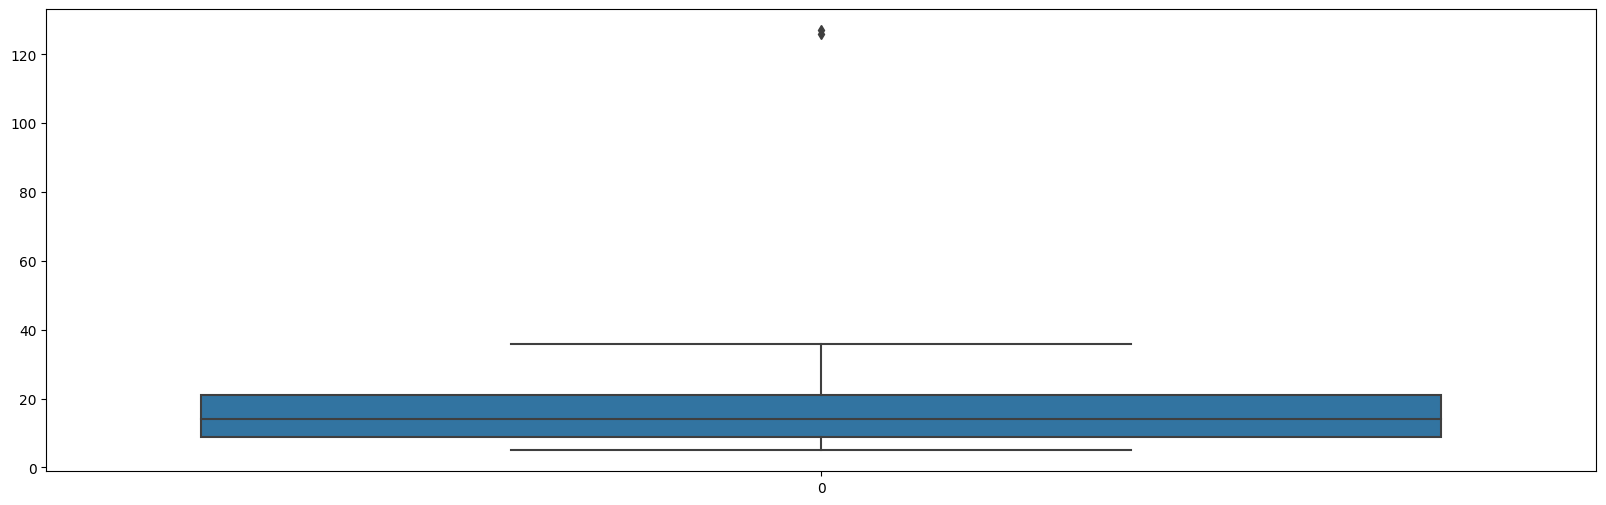

In [19]:
plt.figure(figsize=(20,6))
sns.boxplot(App_user1['WarehouseToHome'])


In [20]:
# Imputing the missing values with median = 14

App_user1.WarehouseToHome.fillna(app_median,inplace= True)


In [21]:
App_user1.WarehouseToHome.isnull().sum()

0

In [22]:
App_user1.isnull().sum()

Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [23]:
App_user1.HourSpendOnApp.isnull().sum()

255

<Axes: >

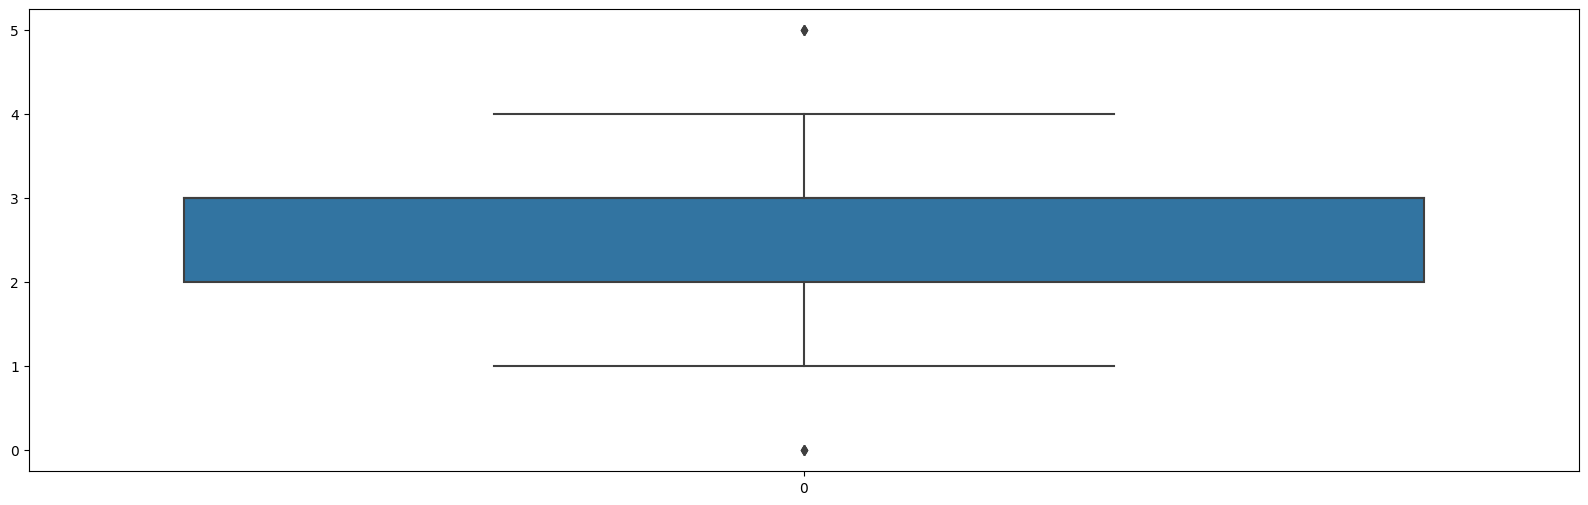

In [24]:
plt.figure(figsize=(20,6))
sns.boxplot(App_user1['HourSpendOnApp'])

In [25]:
App_user1[App_user1.HourSpendOnApp == 0]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
150,0,10.0,Computer,1,6.0,Credit Card,Female,0.0,3,Fashion,2,Married,3,1,18.0,0.0,NaN,2.0,236
950,0,5.0,Mobile Phone,1,16.0,Credit Card,Male,0.0,3,Fashion,1,Single,3,0,25.0,0.0,1.0,NaN,212
1950,0,11.0,Computer,1,18.0,Debit Card,Male,0.0,4,Laptop & Accessory,5,Married,3,0,15.0,1.0,1.0,2.0,163


In [26]:
App_user1.HourSpendOnApp.describe()

count    5111.000000
mean        2.955586
std         0.722699
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: HourSpendOnApp, dtype: float64

In [27]:
App_user1.HourSpendOnApp.value_counts(normalize= True)*100

3.0    50.166308
2.0    26.081002
4.0    22.989630
1.0     0.645666
0.0     0.058697
5.0     0.058697
Name: HourSpendOnApp, dtype: float64

In [28]:
# Since 50% of the data is 3hrs in the hourspendapp columns; therefore, imputing the NAN values with 3

App_user1.HourSpendOnApp.fillna(3,inplace= True)

In [29]:
App_user1.HourSpendOnApp.isnull().sum()

0

In [30]:
App_user1.isnull().sum()

Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                   0
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [31]:
App_user1.OrderAmountHikeFromlastYear.value_counts(normalize= True)

13.0    0.137620
14.0    0.137228
12.0    0.135464
15.0    0.103901
11.0    0.070378
16.0    0.062145
18.0    0.059792
19.0    0.059204
17.0    0.056263
20.0    0.045089
21.0    0.035091
22.0    0.034895
23.0    0.026465
24.0    0.016467
25.0    0.013527
26.0    0.006469
Name: OrderAmountHikeFromlastYear, dtype: float64

<Axes: xlabel='OrderAmountHikeFromlastYear', ylabel='Density'>

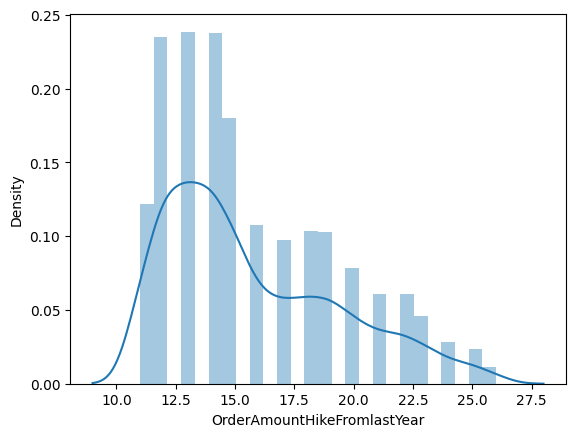

In [32]:
sns.distplot(App_user1.OrderAmountHikeFromlastYear)

In [33]:
# Imputing the values 0 where there is NAN

list1 = ["OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount"]

for i in App_user1[list1]:

    App_user1[i].fillna(0,inplace= True)

In [34]:
App_user1.isnull().sum()

Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                   0
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear      0
CouponUsed                       0
OrderCount                       0
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [35]:
App_user1.DaySinceLastOrder.describe()

count    5059.000000
mean        4.674639
std         3.662903
min         0.000000
25%         2.000000
50%         3.000000
75%         8.000000
max        46.000000
Name: DaySinceLastOrder, dtype: float64

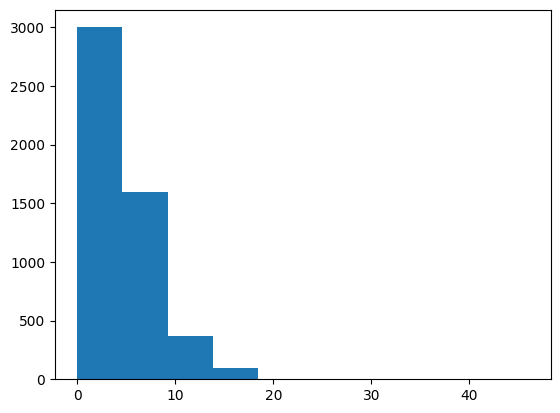

In [36]:
plt.hist(App_user1["DaySinceLastOrder"])
plt.show()

<Axes: xlabel='DaySinceLastOrder', ylabel='Density'>

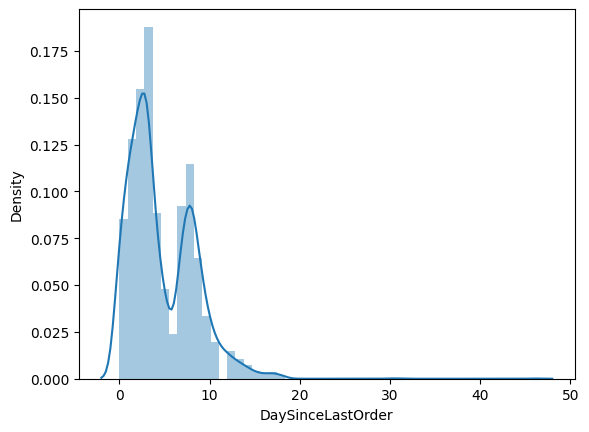

In [37]:
sns.distplot(App_user1["DaySinceLastOrder"])

In [38]:
App_user1.DaySinceLastOrder.value_counts(normalize= True)

3.0     0.172959
2.0     0.142321
1.0     0.118008
8.0     0.105357
7.0     0.084799
4.0     0.081439
0.0     0.078276
9.0     0.059103
5.0     0.044278
10.0    0.031034
6.0     0.021941
11.0    0.017988
12.0    0.013639
13.0    0.009686
14.0    0.006918
15.0    0.003756
17.0    0.003360
16.0    0.002570
18.0    0.001977
30.0    0.000198
46.0    0.000198
31.0    0.000198
Name: DaySinceLastOrder, dtype: float64

In [39]:
App_user1 = App_user1[~ App_user1.DaySinceLastOrder.isnull()]

In [40]:
App_user1.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

<b> Fixing Outliers

In [41]:
App_user1.describe(percentiles=[0.7,0.80,0.85,0.90,0.95,0.98,0.99])

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5059.000000,5059.000000,5059.000000,5059.000000,5059.000000,5059.000000,5059.000000,5059.000000,5059.000000,5059.000000,5059.000000,5059.000000,5059.000000,5059.000000
mean,0.160704,10.098438,1.651117,15.587073,2.945048,3.684523,3.061277,4.241945,0.286618,14.885946,1.662384,2.837122,4.674639,177.541807
std,0.367294,8.570746,0.914842,8.384828,0.705949,1.031387,1.384473,2.587567,0.452226,5.000142,1.845739,2.875971,3.662903,49.063181
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,14.000000,1.000000,2.000000,3.000000,163.000000
70%,0.000000,14.000000,3.000000,17.000000,3.000000,4.000000,4.000000,5.000000,0.000000,17.000000,2.000000,2.000000,7.000000,183.000000
80%,0.000000,18.000000,3.000000,23.000000,4.000000,4.000000,4.000000,6.000000,1.000000,19.000000,2.000000,4.000000,8.000000,200.000000
85%,1.000000,20.000000,3.000000,26.000000,4.000000,5.000000,5.000000,7.000000,1.000000,20.000000,3.000000,5.000000,9.000000,234.000000
90%,1.000000,23.000000,3.000000,30.000000,4.000000,5.000000,5.000000,8.000000,1.000000,21.000000,4.000000,7.000000,9.000000,263.200000
95%,1.000000,27.000000,3.000000,33.000000,4.000000,5.000000,5.000000,10.000000,1.000000,23.000000,6.000000,9.000000,11.000000,293.000000


<Axes: >

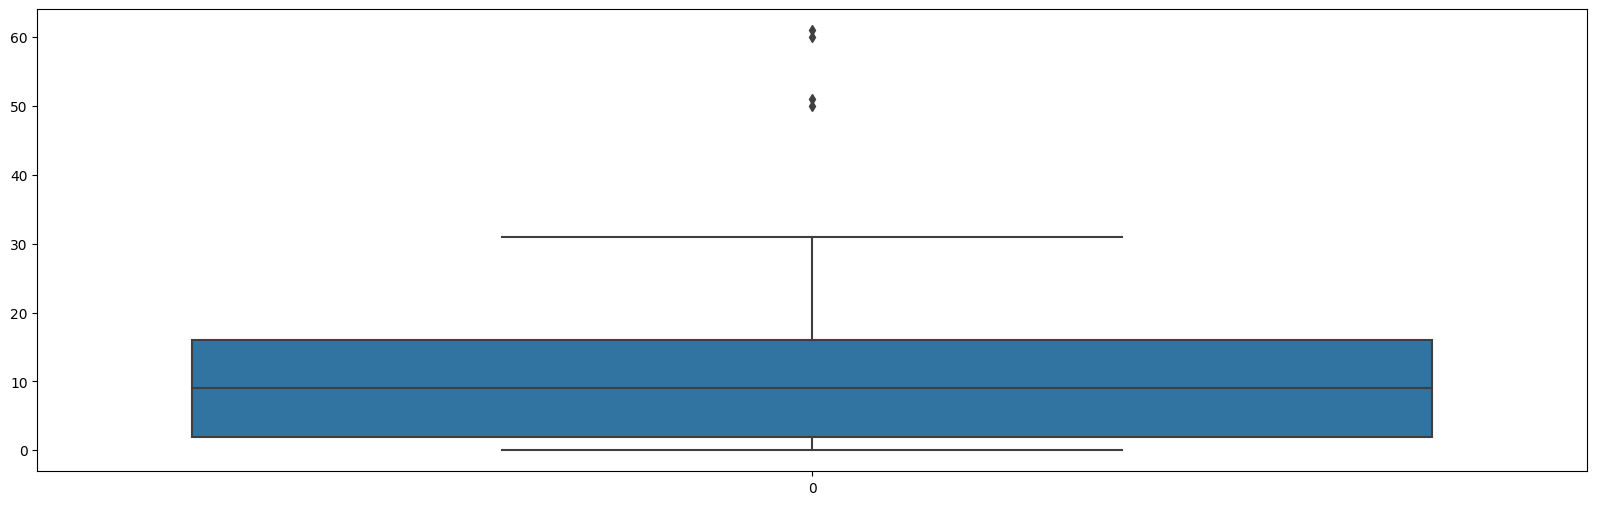

In [42]:
plt.figure(figsize=(20,6))
sns.boxplot(App_user1['Tenure'])

In [43]:
bin_manual = [0,10,20,62]
labs = ["low_tenured", "medium-tenured", "high-tenured"]

App_user1["tenure_group"]= pd.cut(App_user1["Tenure"], bins= bin_manual, labels= labs)

In [44]:
App_user1[["tenure_group", "Tenure"]]

,tenure_group,Tenure
0,low_tenured,4.0
3,NaN,0.0
4,NaN,0.0
5,NaN,0.0
8,medium-tenured,13.0
...,...,...
5624,low_tenured,1.0
5625,low_tenured,10.0
5627,low_tenured,1.0
5628,high-tenured,23.0


In [45]:
App_user1 = App_user1[~ App_user1.tenure_group.isnull()]

In [46]:
App_user1.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,tenure_group
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160,low_tenured
8,1,13.0,Phone,3,9.0,E wallet,Male,3.0,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,127,medium-tenured
10,1,4.0,Mobile Phone,1,18.0,Cash on Delivery,Female,2.0,3,Others,3,Divorced,2,0,0.0,9.0,15.0,8.0,295,low_tenured
11,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,154,medium-tenured
14,1,9.0,Mobile Phone,3,15.0,Credit Card,Male,3.0,4,Fashion,2,Single,2,0,16.0,0.0,4.0,7.0,196,low_tenured


In [47]:
App_user1.drop("Tenure", axis= 1, inplace= True)

In [48]:
App_user1.head()

,Churn,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,tenure_group
0,1,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160,low_tenured
8,1,Phone,3,9.0,E wallet,Male,3.0,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,127,medium-tenured
10,1,Mobile Phone,1,18.0,Cash on Delivery,Female,2.0,3,Others,3,Divorced,2,0,0.0,9.0,15.0,8.0,295,low_tenured
11,1,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,154,medium-tenured
14,1,Mobile Phone,3,15.0,Credit Card,Male,3.0,4,Fashion,2,Single,2,0,16.0,0.0,4.0,7.0,196,low_tenured


In [49]:
App_user1.shape

(4554, 19)

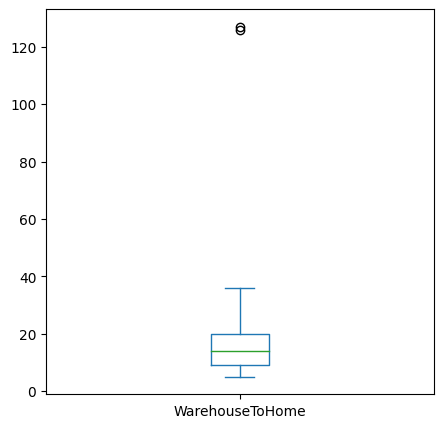

In [50]:
plt.figure(figsize=(5,5))
App_user1.WarehouseToHome.plot.box()
plt.show()

In [54]:
# Some values are really high hence they are outliers and now removing them

q_h = App_user1["WarehouseToHome"].quantile(0.99)

In [55]:
App_user1["WarehouseToHome"] = App_user1["WarehouseToHome"].clip(upper= q_h)

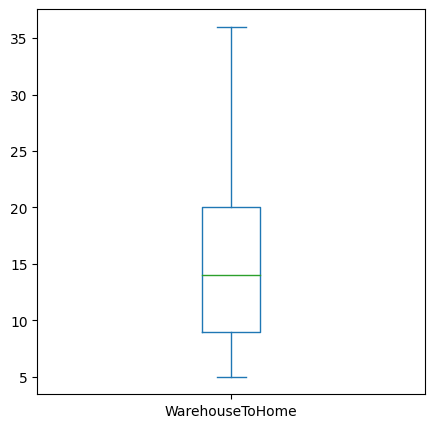

In [56]:
plt.figure(figsize=(5,5))
App_user1.WarehouseToHome.plot.box()
plt.show()

<Axes: >

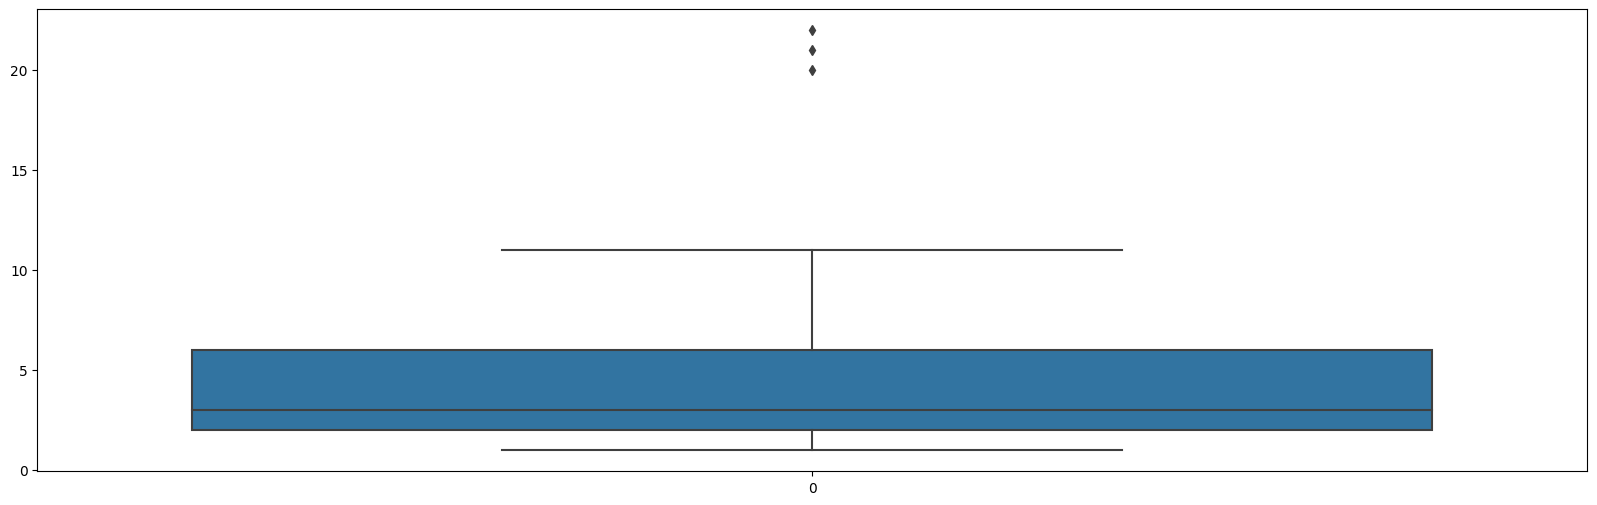

In [57]:
plt.figure(figsize=(20,6))
sns.boxplot(App_user1['NumberOfAddress'])

In [58]:
q_h = App_user1["NumberOfAddress"].quantile(0.99)

App_user1["NumberOfAddress"] = App_user1["NumberOfAddress"].clip(upper= q_h)

<Axes: >

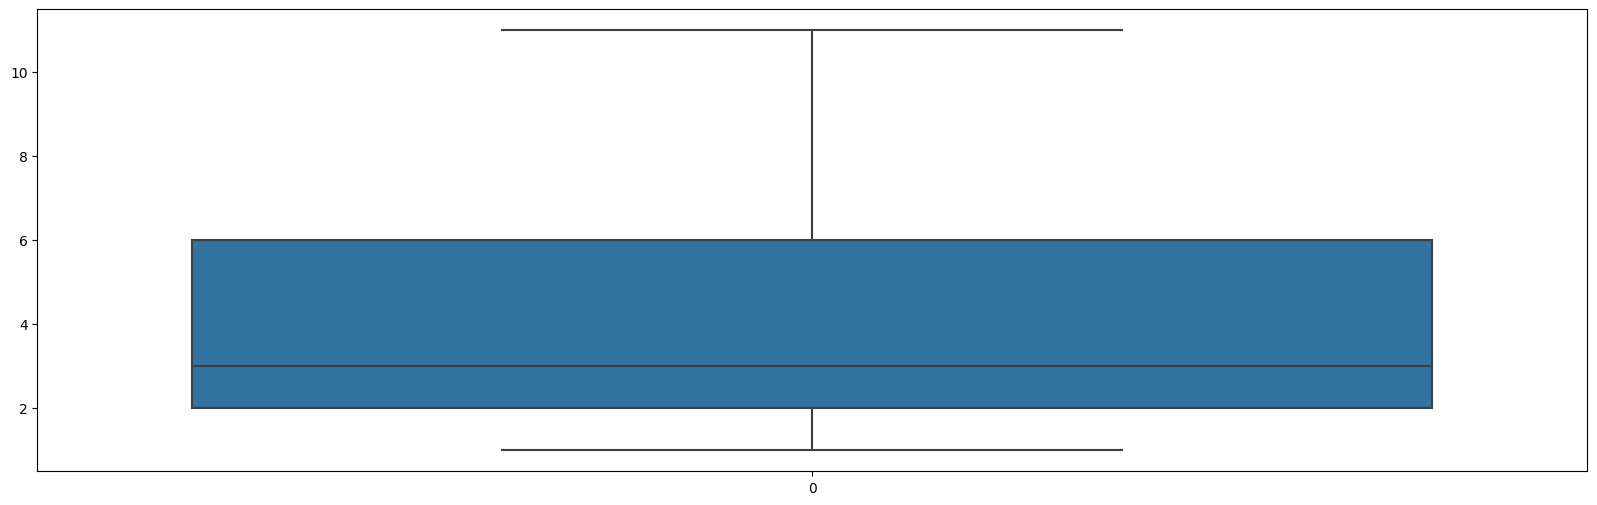

In [59]:
plt.figure(figsize=(20,6))
sns.boxplot(App_user1['NumberOfAddress'])

<Axes: >

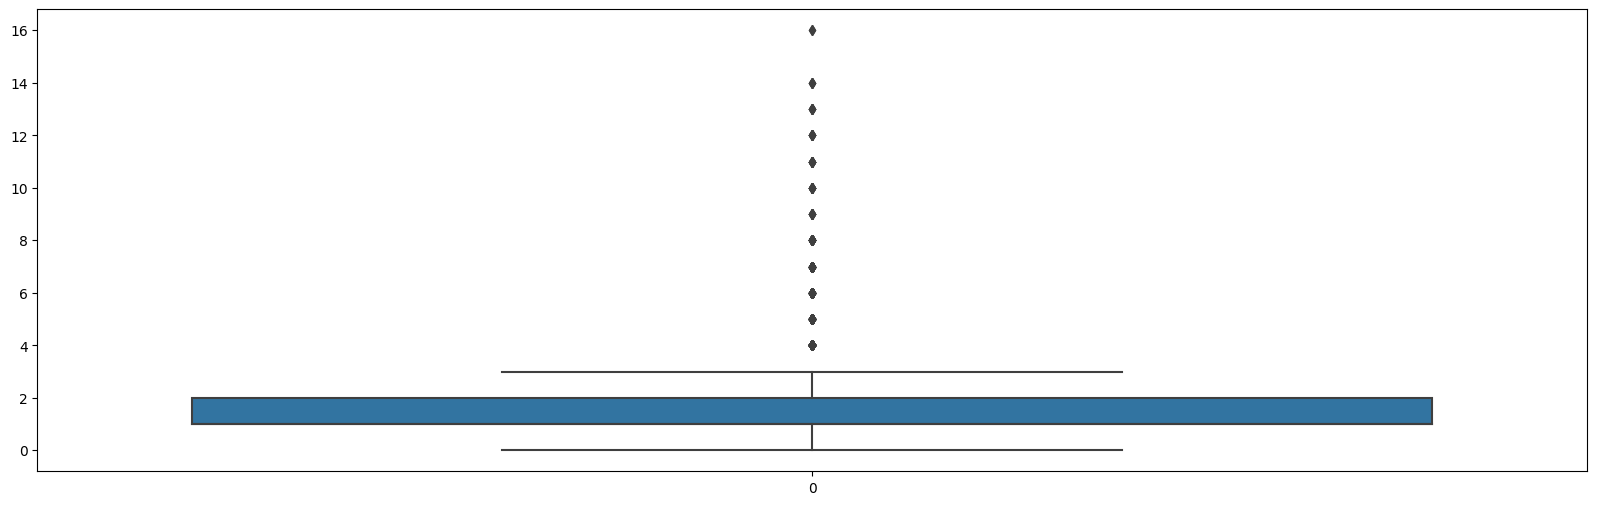

In [61]:
# In CouponUsed - there are many outlier but there is a pattern which is quite visible that values are continuous hence not removing them for this object

plt.figure(figsize=(20,6))
sns.boxplot(App_user1['CouponUsed'])


<Axes: >

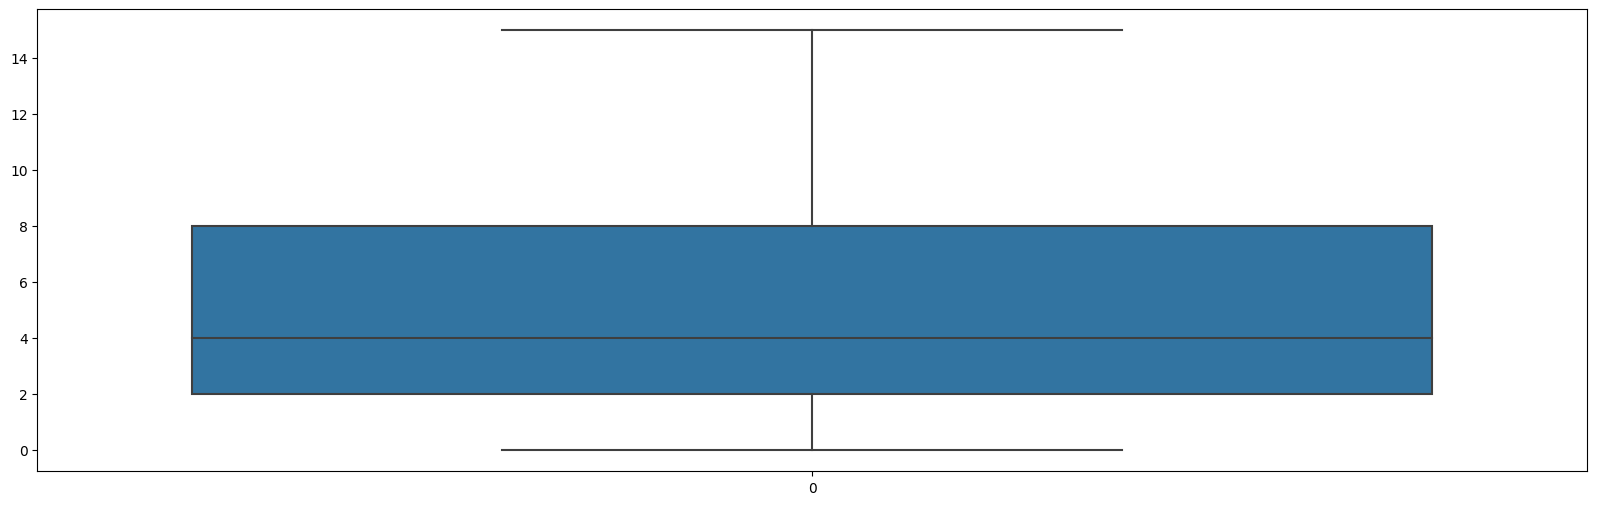

In [64]:
# DaySinceLastOrder has very few outliers without any pattern so removing them

plt.figure(figsize=(20,6))
sns.boxplot(App_user1['DaySinceLastOrder'])


In [65]:
q_h = App_user1["DaySinceLastOrder"].quantile(0.99)

App_user1["DaySinceLastOrder"] = App_user1["DaySinceLastOrder"].clip(upper= q_h)

Now we are done with fixing the missing values and outlier handlings, so let's move forward towards EDA.

### **EDA -**

---



In [66]:
App_user1.head(10)

,Churn,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,tenure_group
0,1,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160,low_tenured
8,1,Phone,3,9.0,E wallet,Male,3.0,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,127,medium-tenured
10,1,Mobile Phone,1,18.0,Cash on Delivery,Female,2.0,3,Others,3,Divorced,2,0,0.0,9.0,15.0,8.0,295,low_tenured
11,1,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,154,medium-tenured
14,1,Mobile Phone,3,15.0,Credit Card,Male,3.0,4,Fashion,2,Single,2,0,16.0,0.0,4.0,7.0,196,low_tenured
19,1,Mobile Phone,1,20.0,Debit Card,Female,3.0,3,Mobile Phone,4,Divorced,10,1,18.0,1.0,4.0,3.0,150,medium-tenured
21,1,Mobile Phone,1,29.0,Credit Card,Female,3.0,3,Fashion,2,Divorced,2,0,12.0,11.0,15.0,6.0,203,medium-tenured
24,1,Computer,1,14.0,Debit Card,Male,2.0,5,Fashion,2,Single,3,0,15.0,0.0,1.0,3.0,207,medium-tenured
26,0,Mobile Phone,3,6.0,E wallet,Male,3.0,3,Fashion,4,Divorced,2,0,13.0,1.0,1.0,6.0,173,low_tenured
28,0,Phone,1,14.0,Debit Card,Male,2.0,3,Laptop & Accessory,4,Married,9,0,18.0,1.0,1.0,15.0,123,medium-tenured


In [69]:
# Convert all the float variables into integer format

In [70]:
App_user1["WarehouseToHome"] = App_user1["WarehouseToHome"].astype("int64")

In [71]:
list1 = ["HourSpendOnApp", "OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount", "DaySinceLastOrder"]

for i in App_user1[list1]:

    App_user1[i] = App_user1[i].astype("int64")



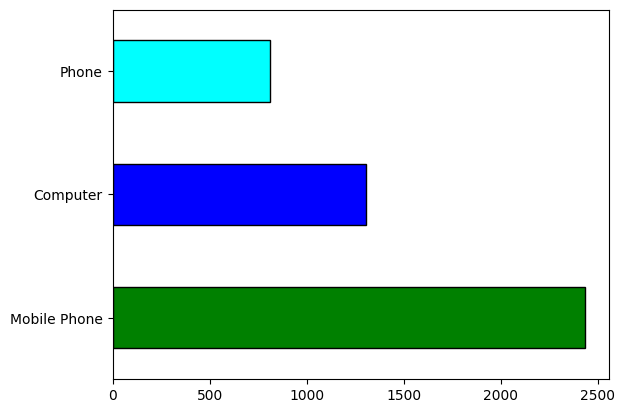

In [72]:
App_user1.PreferredLoginDevice.value_counts().plot.barh(color=['green', 'blue', 'cyan'], edgecolor='black')
plt.show()


Mobile phone users are high in numbers to order almost double.

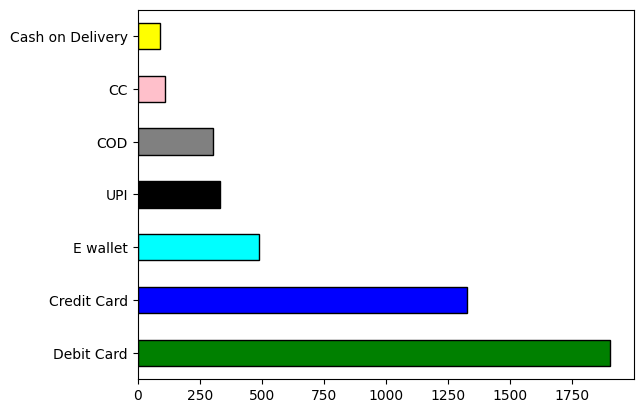

In [73]:
App_user1.PreferredPaymentMode.value_counts().plot.barh(color=['green', 'blue', 'cyan', "black", "grey", "pink", "yellow"], edgecolor='black')
plt.show()


Credit and debit card contributes the highest and minimum is COD.

<Axes: ylabel='tenure_group'>

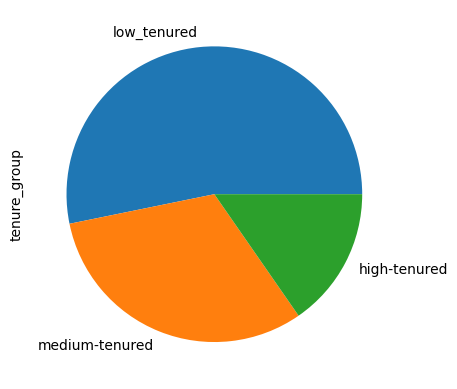

In [74]:
App_user1.tenure_group.value_counts().plot.pie()


Low - tenured customer contributes almost 53% of the entire populations and these are the people who are less than 10 months old in the platform.

In [75]:
App_user1.tenure_group.value_counts(normalize= True)

low_tenured       0.532060
medium-tenured    0.314449
high-tenured      0.153491
Name: tenure_group, dtype: float64

<Axes: ylabel='Churn'>

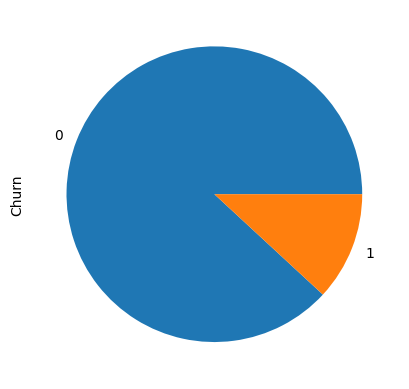

In [76]:
App_user1.Churn.value_counts(normalize= True).plot.pie()

In [77]:
App_user1.Churn.value_counts(normalize= True)

0    0.881203
1    0.118797
Name: Churn, dtype: float64

<Axes: >

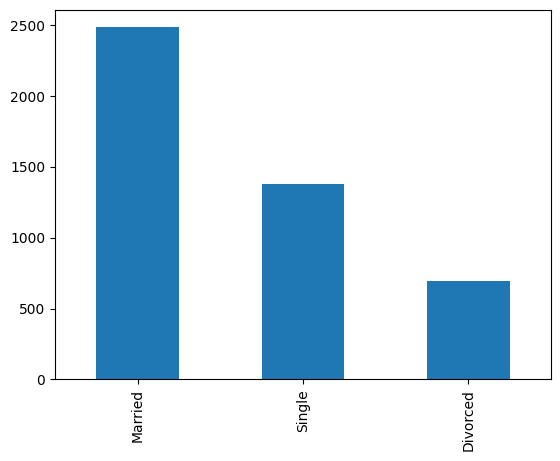

In [78]:
App_user1.MaritalStatus.value_counts().plot.bar()

<Axes: >

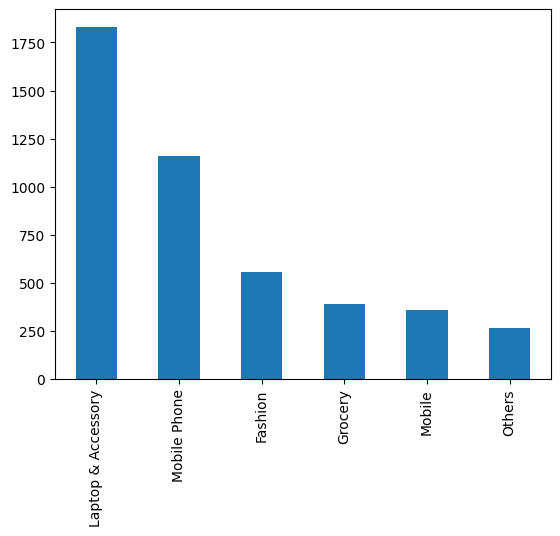

In [79]:
# PreferedOrderCat

App_user1.PreferedOrderCat.value_counts().plot.bar()

<Axes: xlabel='Churn', ylabel='WarehouseToHome'>

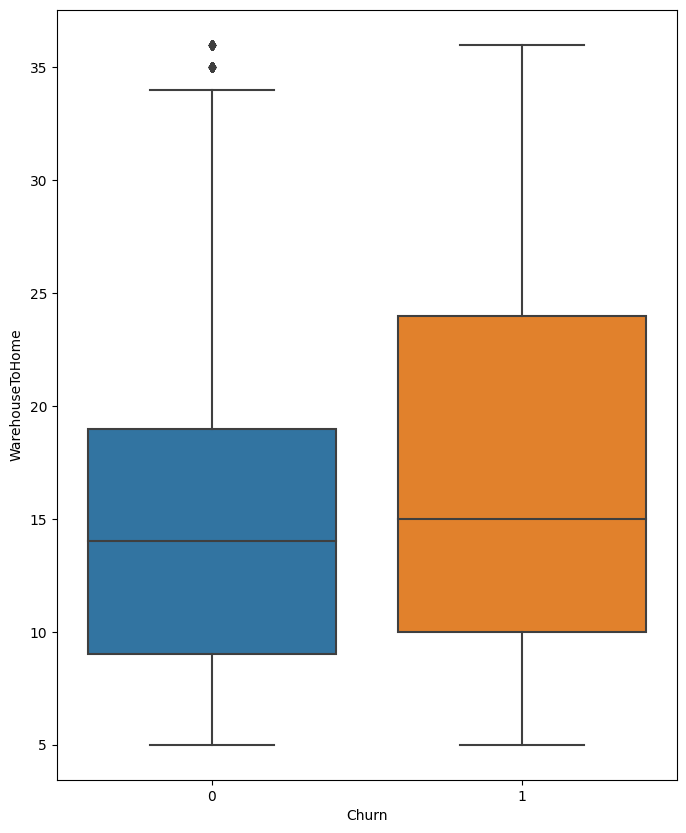

In [80]:
plt.figure(figsize=(8,10))
sns.boxplot(x = "Churn", y = "WarehouseToHome", data= App_user1)

# Distance more than 20kms has a high chance to churn.

In [81]:
App_user1.head()

,Churn,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,tenure_group
0,1,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,160,low_tenured
8,1,Phone,3,9,E wallet,Male,3,4,Mobile,3,Divorced,2,1,14,0,1,2,127,medium-tenured
10,1,Mobile Phone,1,18,Cash on Delivery,Female,2,3,Others,3,Divorced,2,0,0,9,15,8,295,low_tenured
11,1,Mobile Phone,1,6,Debit Card,Male,3,4,Fashion,3,Single,10,1,13,0,1,0,154,medium-tenured
14,1,Mobile Phone,3,15,Credit Card,Male,3,4,Fashion,2,Single,2,0,16,0,4,7,196,low_tenured


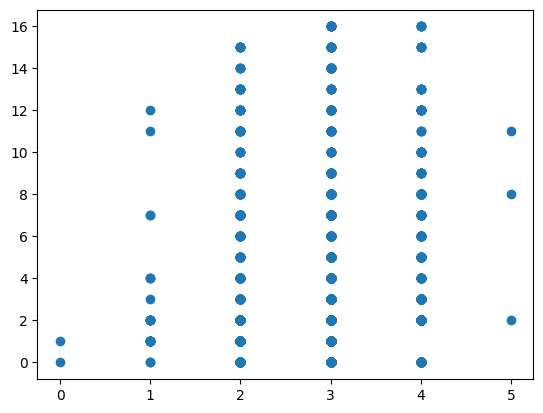

In [82]:
plt.scatter(x = "HourSpendOnApp", y = "OrderCount", data= App_user1)

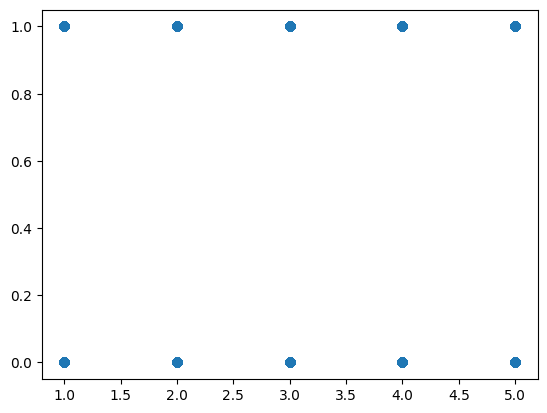

In [83]:
plt.scatter(x = "SatisfactionScore", y = "Complain", data= App_user1)

<Axes: xlabel='OrderCount'>

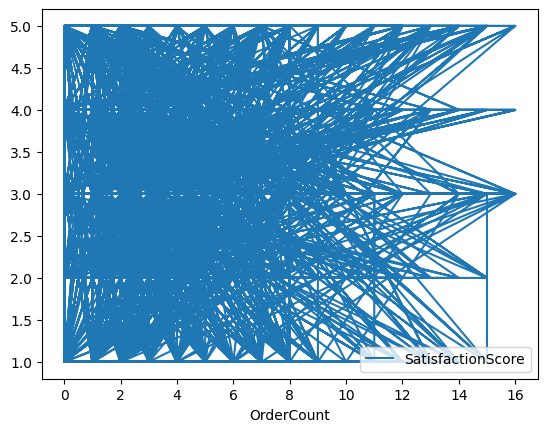

In [84]:
App_user1.plot.line(y= "SatisfactionScore", x = "OrderCount")

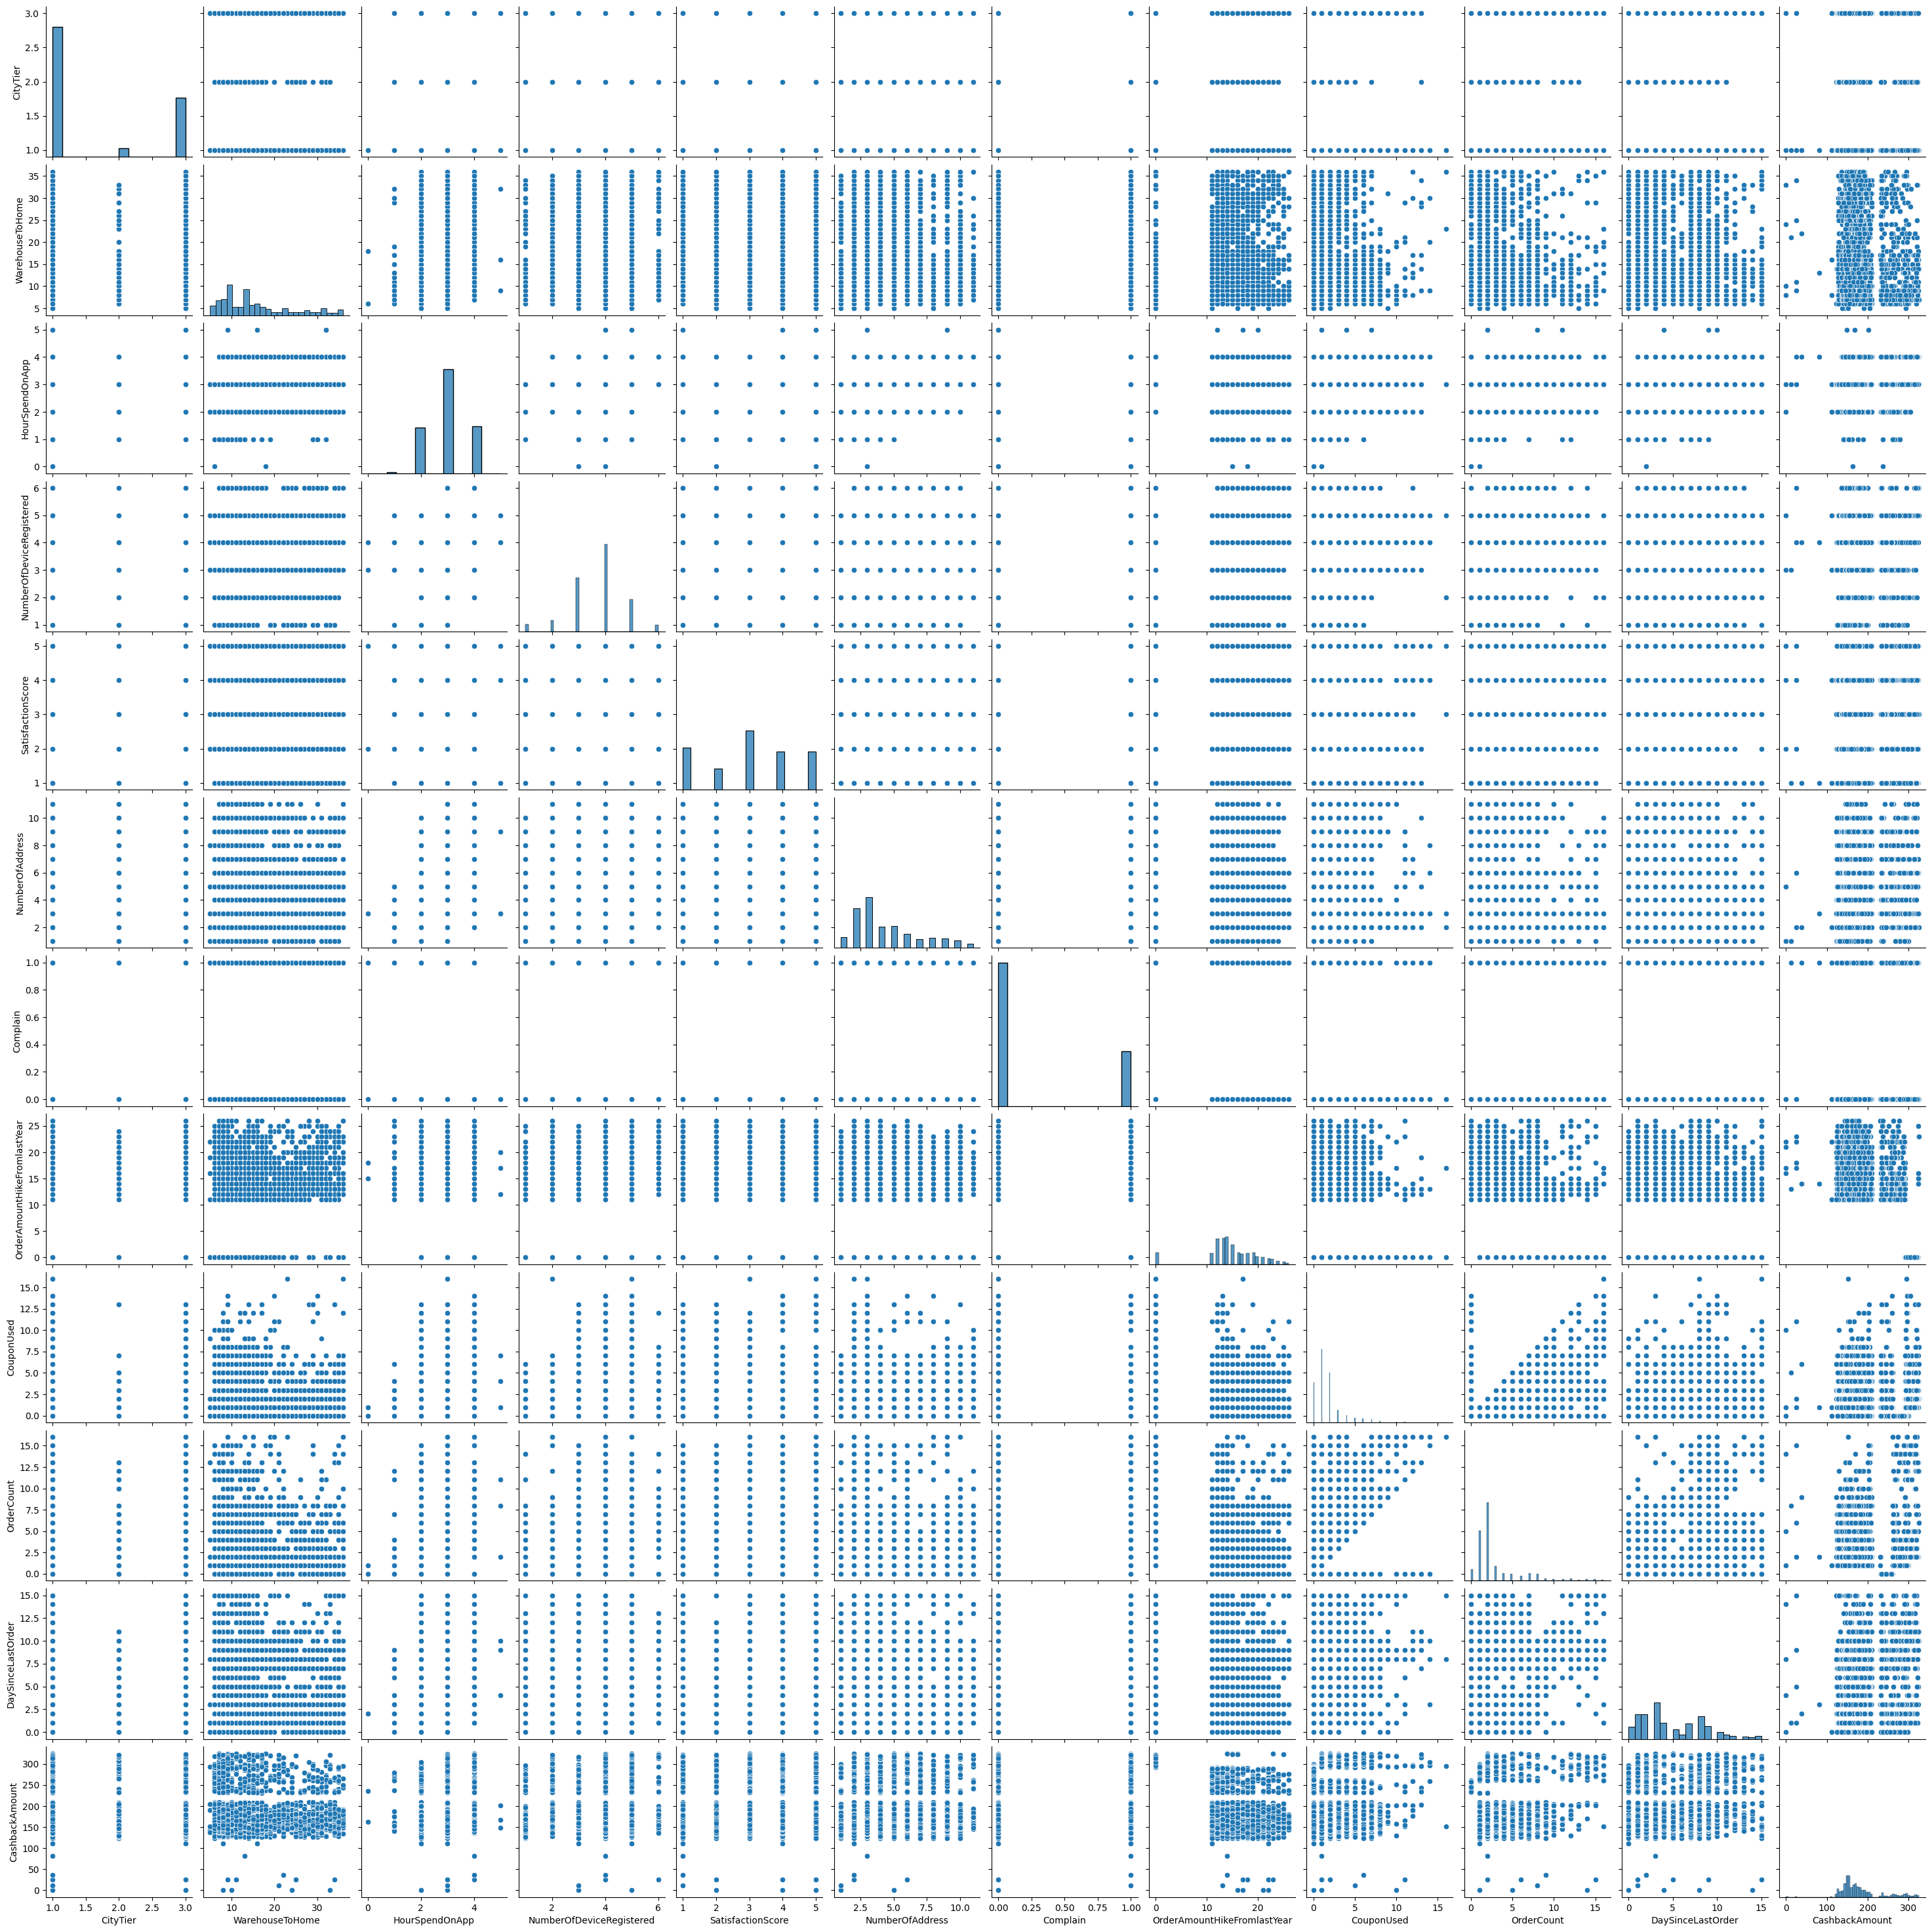

In [85]:
sns.pairplot(data=App_user1, vars=["CityTier", "WarehouseToHome", "HourSpendOnApp", "NumberOfDeviceRegistered", "SatisfactionScore", "NumberOfAddress","Complain","OrderAmountHikeFromlastYear","CouponUsed","OrderCount","DaySinceLastOrder","CashbackAmount"])

In [86]:
res = App_user1[["CityTier", "WarehouseToHome", "HourSpendOnApp", "NumberOfDeviceRegistered", "SatisfactionScore", "NumberOfAddress","Complain","OrderAmountHikeFromlastYear","CouponUsed","OrderCount","DaySinceLastOrder","CashbackAmount"]].corr()

<Axes: >

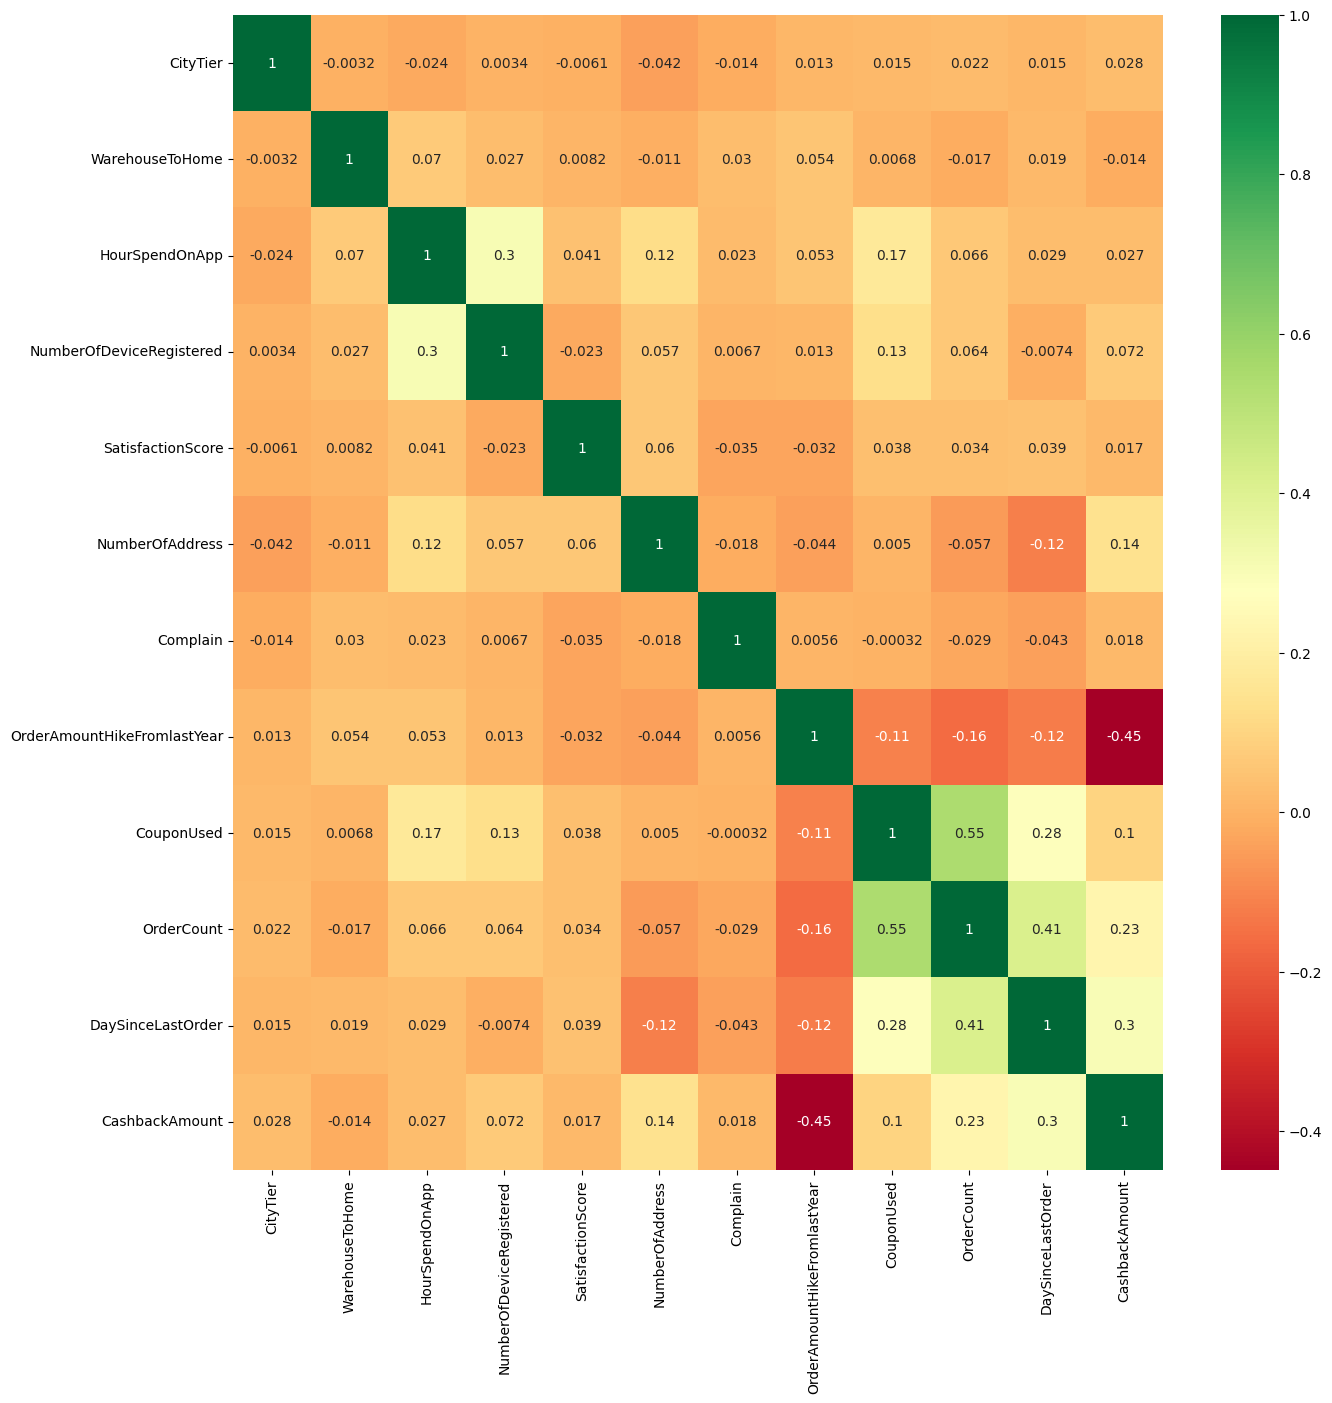

In [87]:
plt.figure(figsize=(15,15))
sns.heatmap(res,annot=True,cmap="RdYlGn")

<Axes: xlabel='MaritalStatus'>

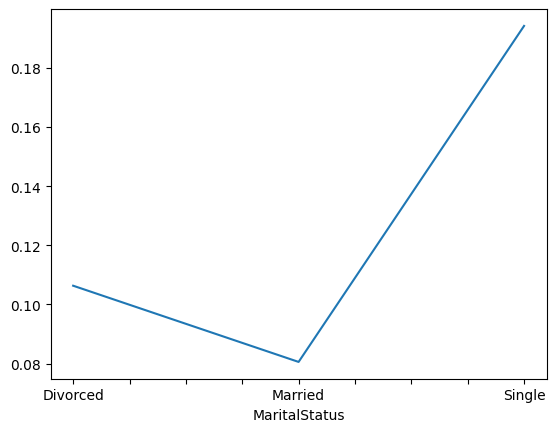

In [88]:
App_user1.groupby("MaritalStatus")["Churn"].mean().plot.line()


Single customer has a higher rate of churn and least when customer is married

In [90]:
App_user1.head()

,Churn,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,tenure_group
0,1,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,160,low_tenured
8,1,Phone,3,9,E wallet,Male,3,4,Mobile,3,Divorced,2,1,14,0,1,2,127,medium-tenured
10,1,Mobile Phone,1,18,Cash on Delivery,Female,2,3,Others,3,Divorced,2,0,0,9,15,8,295,low_tenured
11,1,Mobile Phone,1,6,Debit Card,Male,3,4,Fashion,3,Single,10,1,13,0,1,0,154,medium-tenured
14,1,Mobile Phone,3,15,Credit Card,Male,3,4,Fashion,2,Single,2,0,16,0,4,7,196,low_tenured


<Axes: xlabel='PreferredLoginDevice'>

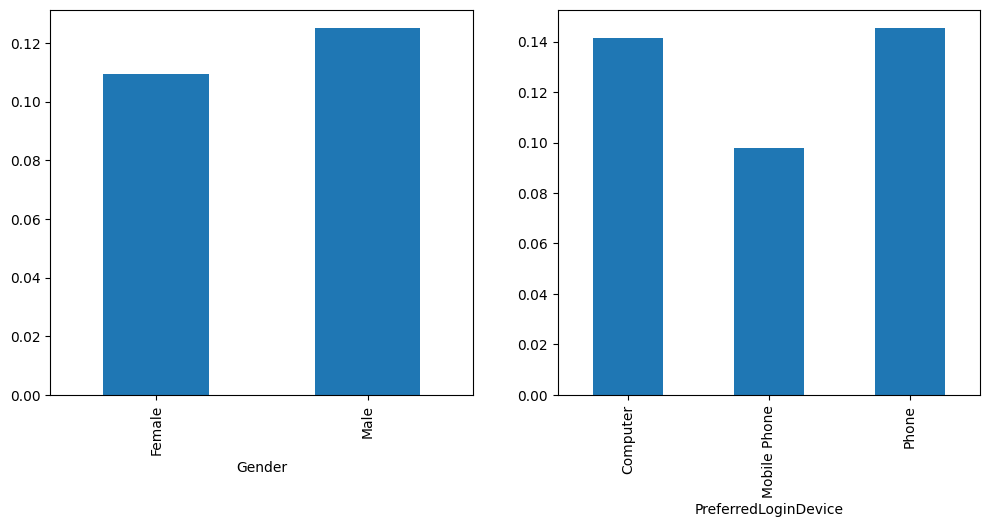

In [91]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
App_user1.groupby("Gender")["Churn"].mean().plot.bar()
plt.subplot(1,2,2)
App_user1.groupby("PreferredLoginDevice")["Churn"].mean().plot.bar()

Male customers who are placing order on the platform through phone call are churning more.

<Axes: xlabel='tenure_group'>

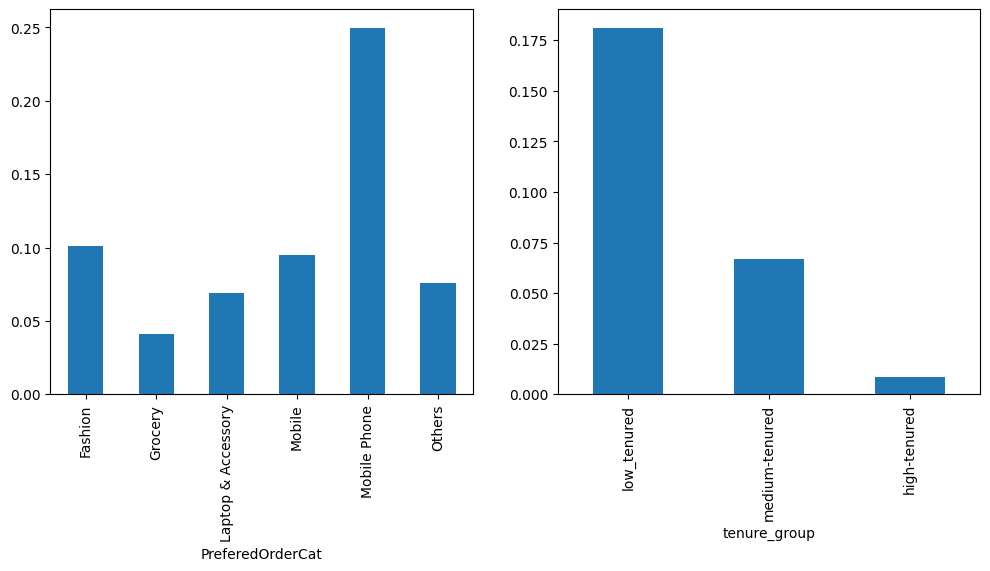

In [92]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
App_user1.groupby("PreferedOrderCat")["Churn"].mean().plot.bar()
plt.subplot(1,2,2)
App_user1.groupby("tenure_group")["Churn"].mean().plot.bar()

Mobile phone category and low - tenured customers are churing more.

In [93]:
App_user1.head()

,Churn,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,tenure_group
0,1,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,160,low_tenured
8,1,Phone,3,9,E wallet,Male,3,4,Mobile,3,Divorced,2,1,14,0,1,2,127,medium-tenured
10,1,Mobile Phone,1,18,Cash on Delivery,Female,2,3,Others,3,Divorced,2,0,0,9,15,8,295,low_tenured
11,1,Mobile Phone,1,6,Debit Card,Male,3,4,Fashion,3,Single,10,1,13,0,1,0,154,medium-tenured
14,1,Mobile Phone,3,15,Credit Card,Male,3,4,Fashion,2,Single,2,0,16,0,4,7,196,low_tenured


<Axes: xlabel='PreferredLoginDevice', ylabel='MaritalStatus'>

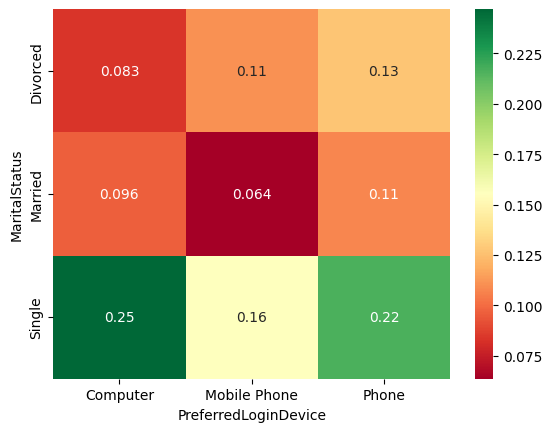

In [94]:
# Will start with multi - variate analysis.

res1 = App_user1.pivot_table(index= "MaritalStatus", columns= "PreferredLoginDevice", values = "Churn")

sns.heatmap(res1,annot=True,cmap="RdYlGn")


Single customers who are logging in with the computer and phone calls are having high chance to churn.

<Axes: xlabel='tenure_group', ylabel='CityTier'>

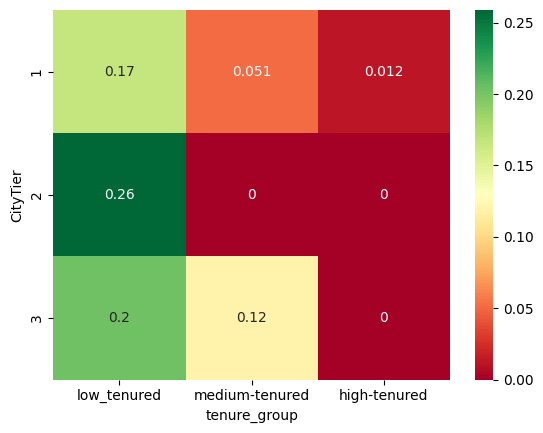

In [95]:
res2 = App_user1.pivot_table(index= "CityTier", columns= "tenure_group", values = "Churn")

sns.heatmap(res2,annot=True,cmap="RdYlGn")

Tier 2 and tier 3 cities with low - tenured group are more likely to churn.

<Axes: xlabel='PreferredPaymentMode', ylabel='PreferedOrderCat'>

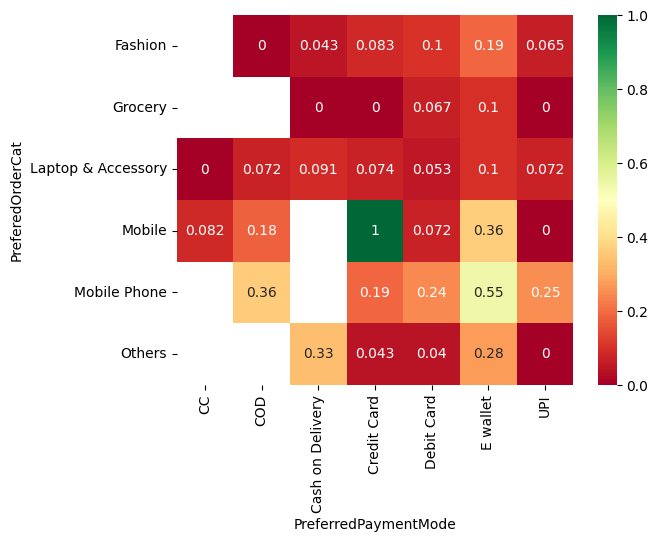

In [96]:
res3 = App_user1.pivot_table(index= "PreferedOrderCat", columns= "PreferredPaymentMode", values = "Churn")

sns.heatmap(res3,annot=True,cmap="RdYlGn", center= 0.5)


Mobile phone and COD & credit card are at risk and likely to churn.

## **Model building -**

---



In [97]:
App_user1.head()

,Churn,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,tenure_group
0,1,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,160,low_tenured
8,1,Phone,3,9,E wallet,Male,3,4,Mobile,3,Divorced,2,1,14,0,1,2,127,medium-tenured
10,1,Mobile Phone,1,18,Cash on Delivery,Female,2,3,Others,3,Divorced,2,0,0,9,15,8,295,low_tenured
11,1,Mobile Phone,1,6,Debit Card,Male,3,4,Fashion,3,Single,10,1,13,0,1,0,154,medium-tenured
14,1,Mobile Phone,3,15,Credit Card,Male,3,4,Fashion,2,Single,2,0,16,0,4,7,196,low_tenured


In [98]:
# Create dummy variables for categorical variables

dummy1 = pd.get_dummies(App_user1[["PreferredLoginDevice", "PreferredPaymentMode", "PreferedOrderCat", "MaritalStatus", "tenure_group"]])

App_user2 = pd.concat([App_user1,dummy1], axis=1)

In [99]:
App_user2.head()

,Churn,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,...,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,tenure_group_low_tenured,tenure_group_medium-tenured,tenure_group_high-tenured
0,1,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,...,1,0,0,0,0,0,1,1,0,0
8,1,Phone,3,9,E wallet,Male,3,4,Mobile,3,...,0,1,0,0,1,0,0,0,1,0
10,1,Mobile Phone,1,18,Cash on Delivery,Female,2,3,Others,3,...,0,0,0,1,1,0,0,1,0,0
11,1,Mobile Phone,1,6,Debit Card,Male,3,4,Fashion,3,...,0,0,0,0,0,0,1,0,1,0
14,1,Mobile Phone,3,15,Credit Card,Male,3,4,Fashion,2,...,0,0,0,0,0,0,1,1,0,0


In [100]:
dummy3 = pd.get_dummies(App_user1[["PreferredLoginDevice", "PreferredPaymentMode", "PreferedOrderCat", "MaritalStatus", "tenure_group"]],drop_first=True)

App_user4 = pd.concat([App_user1,dummy3], axis=1)

In [101]:
App_user4.head()

,Churn,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,...,PreferredPaymentMode_UPI,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,tenure_group_medium-tenured,tenure_group_high-tenured
0,1,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,...,0,0,1,0,0,0,0,1,0,0
8,1,Phone,3,9,E wallet,Male,3,4,Mobile,3,...,0,0,0,1,0,0,0,0,1,0
10,1,Mobile Phone,1,18,Cash on Delivery,Female,2,3,Others,3,...,0,0,0,0,0,1,0,0,0,0
11,1,Mobile Phone,1,6,Debit Card,Male,3,4,Fashion,3,...,0,0,0,0,0,0,0,1,1,0
14,1,Mobile Phone,3,15,Credit Card,Male,3,4,Fashion,2,...,0,0,0,0,0,0,0,1,0,0


In [102]:
del App_user2

In [103]:
App_user4 = App_user4.drop(["PreferredLoginDevice", "PreferredPaymentMode", "PreferedOrderCat", "MaritalStatus", "tenure_group"], 1)

In [104]:
App_user4.head()

,Churn,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_UPI,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,tenure_group_medium-tenured,tenure_group_high-tenured
0,1,3,6,Female,3,3,2,9,1,11,...,0,0,1,0,0,0,0,1,0,0
8,1,3,9,Male,3,4,3,2,1,14,...,0,0,0,1,0,0,0,0,1,0
10,1,1,18,Female,2,3,3,2,0,0,...,0,0,0,0,0,1,0,0,0,0
11,1,1,6,Male,3,4,3,10,1,13,...,0,0,0,0,0,0,0,1,1,0
14,1,3,15,Male,3,4,2,2,0,16,...,0,0,0,0,0,0,0,1,0,0


In [105]:
App_user4["Gender"] = App_user4["Gender"].apply(lambda x : 1 if x == "Male" else 0)

In [106]:
App_user4.head()

,Churn,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_UPI,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,tenure_group_medium-tenured,tenure_group_high-tenured
0,1,3,6,0,3,3,2,9,1,11,...,0,0,1,0,0,0,0,1,0,0
8,1,3,9,1,3,4,3,2,1,14,...,0,0,0,1,0,0,0,0,1,0
10,1,1,18,0,2,3,3,2,0,0,...,0,0,0,0,0,1,0,0,0,0
11,1,1,6,1,3,4,3,10,1,13,...,0,0,0,0,0,0,0,1,1,0
14,1,3,15,1,3,4,2,2,0,16,...,0,0,0,0,0,0,0,1,0,0


In [107]:
App_user4.head()

pd.set_option('display.max_columns', None)

In [108]:
App_user4.head()

,Churn,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,tenure_group_medium-tenured,tenure_group_high-tenured
0,1,3,6,0,3,3,2,9,1,11,1,1,5,160,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
8,1,3,9,1,3,4,3,2,1,14,0,1,2,127,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
10,1,1,18,0,2,3,3,2,0,0,9,15,8,295,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
11,1,1,6,1,3,4,3,10,1,13,0,1,0,154,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
14,1,3,15,1,3,4,2,2,0,16,0,4,7,196,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [109]:
# Data - set is ready for model building. Let's start the test - train split

# Putting feature variable to X
X = App_user4.drop('Churn',axis=1)

# Putting response variable to y
y = App_user4["Churn"]

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify= y, random_state=42)
X_train.shape, X_test.shape

((3187, 30), (1367, 30))

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
scaler = StandardScaler()

X_train[['CashbackAmount','OrderAmountHikeFromlastYear','WarehouseToHome']] = scaler.fit_transform(X_train[['CashbackAmount','OrderAmountHikeFromlastYear','WarehouseToHome']])

X_train.head()

,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,tenure_group_medium-tenured,tenure_group_high-tenured
5210,1,0.071736,0,4,4,1,3,0,-0.161024,1,6,9,-0.392207,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2830,2,-0.300006,1,4,4,5,6,1,1.587799,2,2,3,-0.712706,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
301,1,-0.176092,0,2,3,2,1,0,-0.161024,5,6,7,-1.113329,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1010,3,-1.167404,1,2,1,5,2,0,0.033290,0,1,12,1.891345,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0
1110,3,-0.919576,1,3,3,1,5,1,-0.549651,0,1,3,0.449102,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


<Axes: >

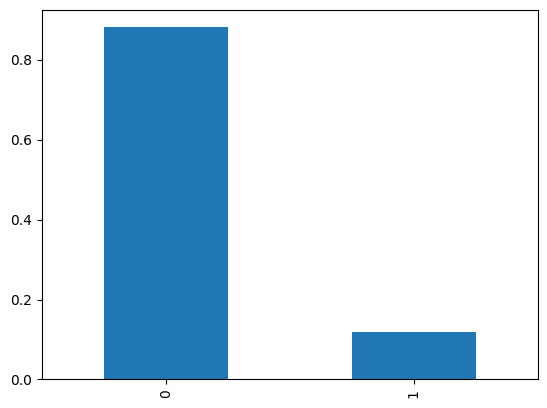

In [114]:
y_train.value_counts(normalize= True).plot.bar() ## check if data is imbalanced

In [115]:
# doing SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

5616

In [116]:
from collections import Counter

print(sorted(Counter(y_resampled_smt).items()))

[(0, 2808), (1, 2808)]


<Axes: >

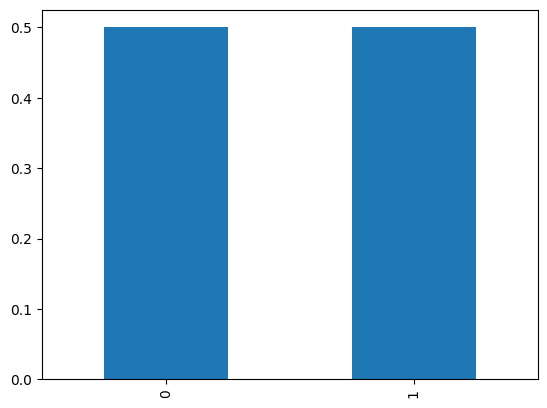

In [117]:
y_resampled_smt.value_counts(normalize= True).plot.bar() ## now the dataset is balanced

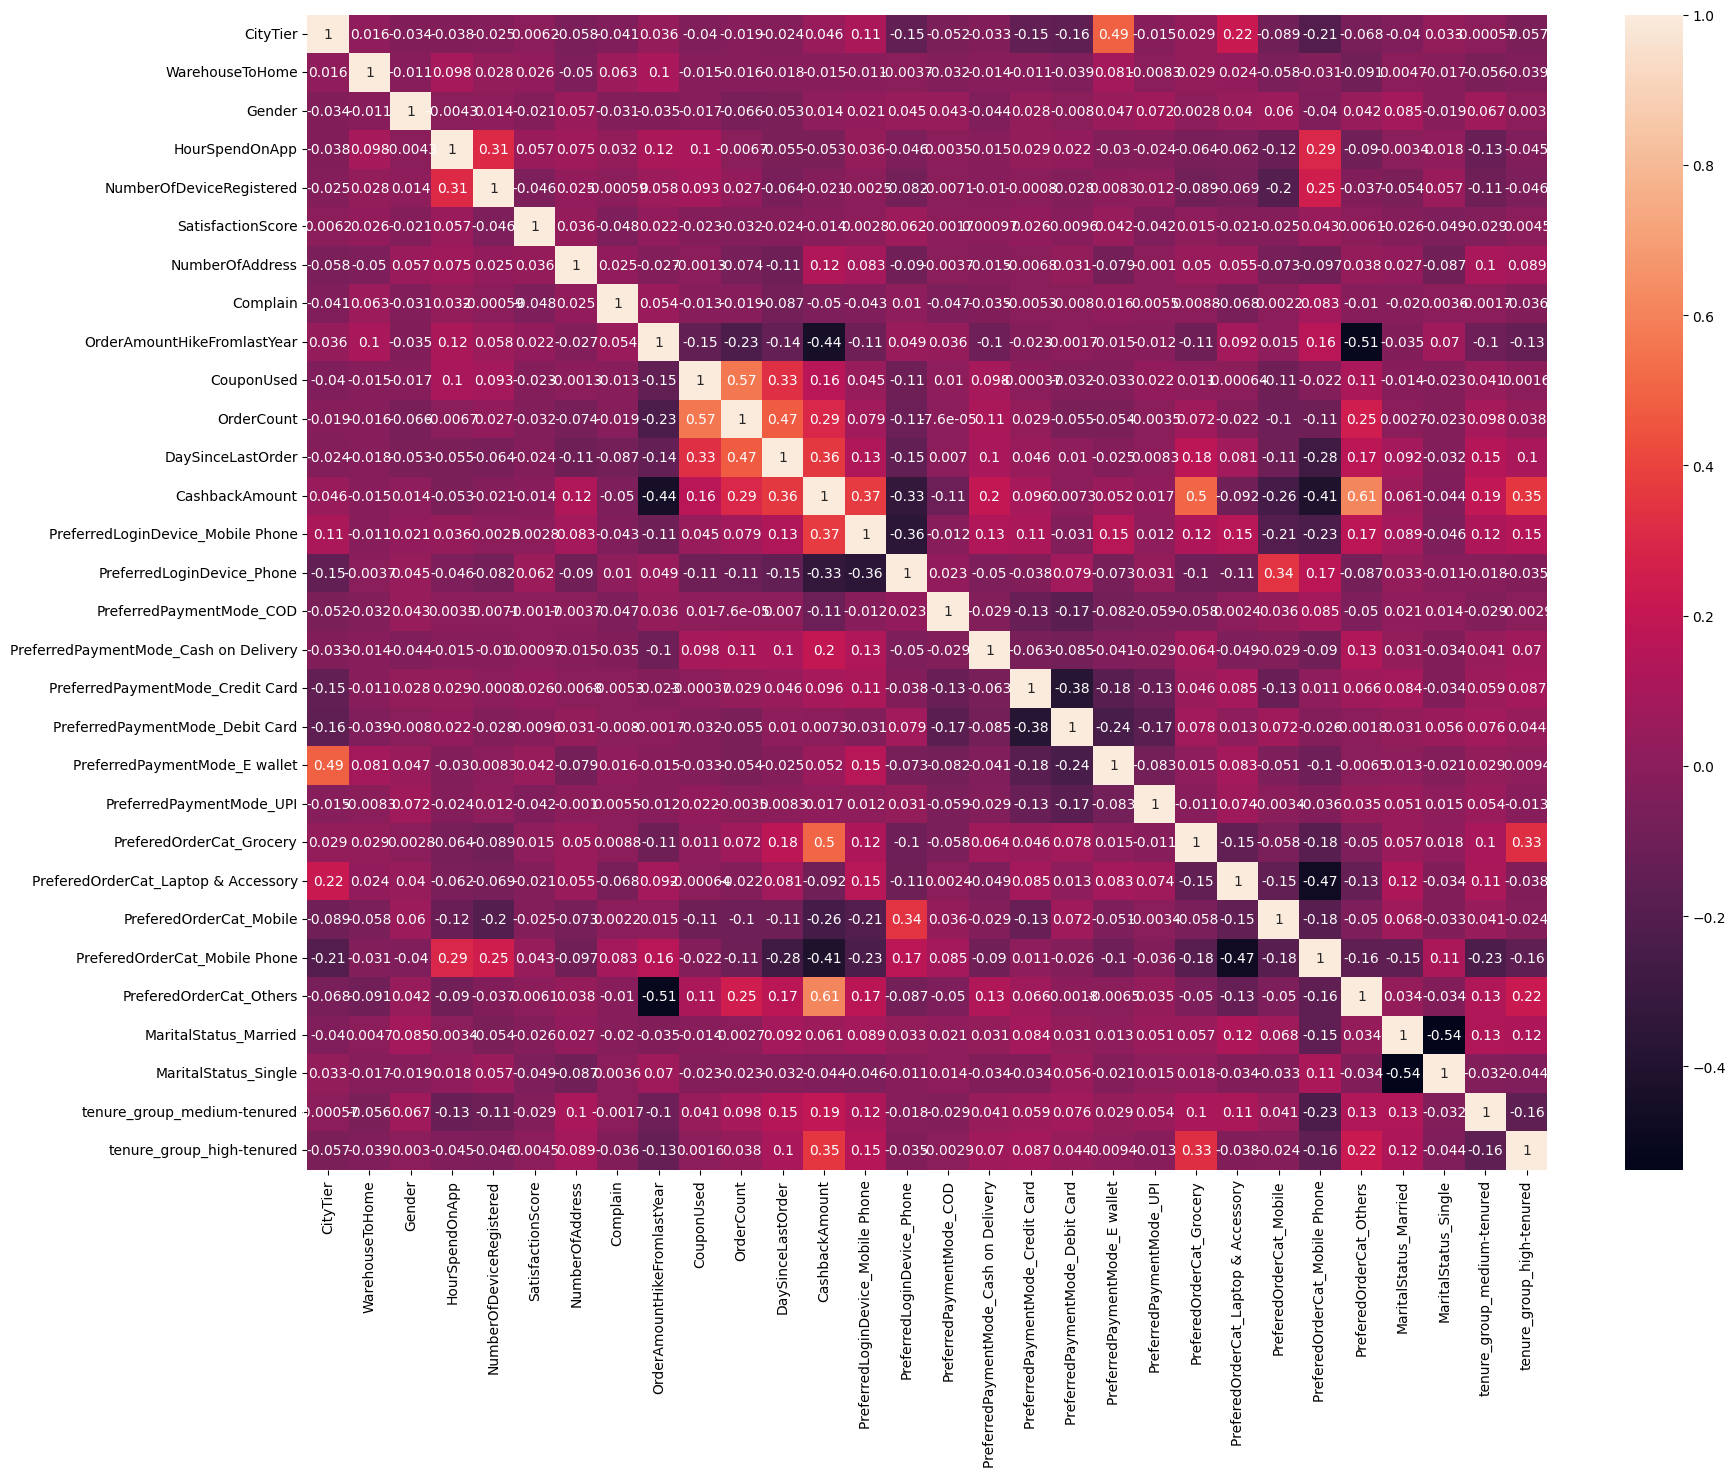

In [118]:
plt.figure(figsize = (20,15))
sns.heatmap(X_resampled_smt.corr(),annot = True)
plt.show()

In [119]:
import statsmodels.api as sm

# Logistic regression model

logm1 = sm.GLM(y_resampled_smt,(sm.add_constant(X_resampled_smt)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5616
Model:                            GLM   Df Residuals:                     5585
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1714.5
Date:                Sun, 30 Jul 2023   Deviance:                       3429.0
Time:                        05:07:30   Pearson chi2:                 6.10e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5396
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.8217      0.375      7.520      0.000       2.086       3.557
CityTier                                  0.2711      0.060      4.483      0.000       0.153       0.390
WarehouseToHome                           0.3075      0.045      6.766      0.000       0.218       0.397
Gender                                    0.0610      0.090      0.680      0.496      -0.115       0.237
HourSpendOnApp                           -0.1163      0.076     -1.536      0.125      -0.265       0.032
NumberOfDeviceRegistered                  0.3830      0.052      7.326      0.000       0.281       0.485
SatisfactionScore                         0.1559      0.034      4.542      0.000       0.089       0.223
NumberOfAddress                           0.2071      0.019     10.955      0.000       0.170       0.244
Complain                                  1.4104      0.097     14.562      0.000       1.221       1.600
OrderAmountHikeFromlastYear               0.0511      0.060      0.854      0.393      -0.066       0.168
CouponUsed                                0.0321      0.032      1.010      0.313      -0.030       0.094
OrderCount                                0.1432      0.022      6.568      0.000       0.100       0.186
DaySinceLastOrder                        -0.1766      0.017    -10.334      0.000      -0.210      -0.143
CashbackAmount                           -0.6308      0.124     -5.098      0.000      -0.873      -0.388
PreferredLoginDevice_Mobile Phone        -1.1968      0.102    -11.758      0.000      -1.396      -0.997
PreferredLoginDevice_Phone               -1.0400      0.138     -7.560      0.000      -1.310      -0.770
PreferredPaymentMode_COD                 -2.8440      0.252    -11.281      0.000      -3.338      -2.350
PreferredPaymentMode_Cash on Delivery    -3.6748      0.454     -8.097      0.000      -4.564      -2.785
PreferredPaymentMode_Credit Card         -3.4001      0.210    -16.172      0.000      -3.812      -2.988
PreferredPaymentMode_Debit Card          -3.2532      0.203    -16.052      0.000      -3.650      -2.856
PreferredPaymentMode_E wallet            -2.4304      0.236    -10.295      0.000      -2.893      -1.968
PreferredPaymentMode_UPI                 -3.4328      0.254    -13.525      0.000      -3.930      -2.935
PreferedOrderCat_Grocery                 -0.0323      0.305     -0.106      0.916      -0.630       0.566
PreferedOrderCat_Laptop & Accessory      -2.6482      0.155    -17.135      0.000      -2.951      -2.345
PreferedOrderCat_Mobile                  -3.9044      0.299    -13.078      0.000      -4.490      -3.319
PreferedOrderCat_Mobile Phone            -1.0825      0.177     -6.106      0.000      -1.430      -0.735
PreferedO

In [120]:
## Feature Elimination (RFE)


from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [121]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_resampled_smt, y_resampled_smt)

In [122]:
rfe.support_

array([False,  True, False, False,  True, False, False,  True, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True])

In [123]:
list(zip(X_resampled_smt.columns, rfe.support_, rfe.ranking_))

[('CityTier', False, 2),
 ('WarehouseToHome', True, 1),
 ('Gender', False, 11),
 ('HourSpendOnApp', False, 8),
 ('NumberOfDeviceRegistered', True, 1),
 ('SatisfactionScore', False, 7),
 ('NumberOfAddress', False, 3),
 ('Complain', True, 1),
 ('OrderAmountHikeFromlastYear', False, 9),
 ('CouponUsed', False, 10),
 ('OrderCount', False, 6),
 ('DaySinceLastOrder', False, 4),
 ('CashbackAmount', True, 1),
 ('PreferredLoginDevice_Mobile Phone', True, 1),
 ('PreferredLoginDevice_Phone', True, 1),
 ('PreferredPaymentMode_COD', True, 1),
 ('PreferredPaymentMode_Cash on Delivery', True, 1),
 ('PreferredPaymentMode_Credit Card', True, 1),
 ('PreferredPaymentMode_Debit Card', True, 1),
 ('PreferredPaymentMode_E wallet', True, 1),
 ('PreferredPaymentMode_UPI', True, 1),
 ('PreferedOrderCat_Grocery', False, 5),
 ('PreferedOrderCat_Laptop & Accessory', True, 1),
 ('PreferedOrderCat_Mobile', True, 1),
 ('PreferedOrderCat_Mobile Phone', True, 1),
 ('PreferedOrderCat_Others', True, 1),
 ('MaritalStatus_

In [124]:
col = X_resampled_smt.columns[rfe.support_]

In [125]:
X_train_sm = sm.add_constant(X_resampled_smt[col])
logm2 = sm.GLM(y_resampled_smt,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5616
Model:                            GLM   Df Residuals:                     5595
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1880.5
Date:                Sun, 30 Jul 2023   Deviance:                       3761.0
Time:                        05:07:48   Pearson chi2:                 6.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5116
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     3.9904      0.263     15.201      0.000       3.476       4.505
WarehouseToHome                           0.2667      0.042      6.386      0.000       0.185       0.349
NumberOfDeviceRegistered                  0.3594      0.046      7.765      0.000       0.269       0.450
Complain                                  1.4276      0.092     15.486      0.000       1.247       1.608
CashbackAmount                           -0.6016      0.095     -6.307      0.000      -0.788      -0.415
PreferredLoginDevice_Mobile Phone        -0.9984      0.095    -10.553      0.000      -1.184      -0.813
PreferredLoginDevice_Phone               -1.0239      0.130     -7.882      0.000      -1.279      -0.769
PreferredPaymentMode_COD                 -3.0261      0.236    -12.826      0.000      -3.489      -2.564
PreferredPaymentMode_Cash on Delivery    -3.8745      0.408     -9.493      0.000      -4.674      -3.075
PreferredPaymentMode_Credit Card         -3.5474      0.197    -17.973      0.000      -3.934      -3.161
PreferredPaymentMode_Debit Card          -3.3115      0.189    -17.510      0.000      -3.682      -2.941
PreferredPaymentMode_E wallet            -2.2933      0.210    -10.945      0.000      -2.704      -1.883
PreferredPaymentMode_UPI                 -3.4752      0.238    -14.581      0.000      -3.942      -3.008
PreferedOrderCat_Laptop & Accessory      -2.2859      0.139    -16.400      0.000      -2.559      -2.013
PreferedOrderCat_Mobile                  -3.7601      0.279    -13.479      0.000      -4.307      -3.213
PreferedOrderCat_Mobile Phone            -0.8450      0.155     -5.465      0.000      -1.148      -0.542
PreferedOrderCat_Others                   1.4715      0.288      5.101      0.000       0.906       2.037
MaritalStatus_Married                    -1.8013      0.105    -17.134      0.000      -2.007      -1.595
MaritalStatus_Single                     -0.6404      0.106     -6.056      0.000      -0.848      -0.433
tenure_group_medium-tenured              -1.6733      0.112    -14.979      0.000      -1.892      -1.454
tenure_group_high-tenured                -4.6855      0.406    -11.553      0.000      -5.480      -3.891
=========================================================================================================
"""

In [126]:
X_resampled_smt.columns[~rfe.support_]

Index(['CityTier', 'Gender', 'HourSpendOnApp', 'SatisfactionScore',
       'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed',
       'OrderCount', 'DaySinceLastOrder', 'PreferedOrderCat_Grocery'],
      dtype='object')

In [127]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=25)             # running RFE with 25 variables as output
rfe = rfe.fit(X_resampled_smt, y_resampled_smt)

In [128]:
list(zip(X_resampled_smt.columns, rfe.support_, rfe.ranking_))

[('CityTier', True, 1),
 ('WarehouseToHome', True, 1),
 ('Gender', False, 6),
 ('HourSpendOnApp', False, 3),
 ('NumberOfDeviceRegistered', True, 1),
 ('SatisfactionScore', False, 2),
 ('NumberOfAddress', True, 1),
 ('Complain', True, 1),
 ('OrderAmountHikeFromlastYear', False, 4),
 ('CouponUsed', False, 5),
 ('OrderCount', True, 1),
 ('DaySinceLastOrder', True, 1),
 ('CashbackAmount', True, 1),
 ('PreferredLoginDevice_Mobile Phone', True, 1),
 ('PreferredLoginDevice_Phone', True, 1),
 ('PreferredPaymentMode_COD', True, 1),
 ('PreferredPaymentMode_Cash on Delivery', True, 1),
 ('PreferredPaymentMode_Credit Card', True, 1),
 ('PreferredPaymentMode_Debit Card', True, 1),
 ('PreferredPaymentMode_E wallet', True, 1),
 ('PreferredPaymentMode_UPI', True, 1),
 ('PreferedOrderCat_Grocery', True, 1),
 ('PreferedOrderCat_Laptop & Accessory', True, 1),
 ('PreferedOrderCat_Mobile', True, 1),
 ('PreferedOrderCat_Mobile Phone', True, 1),
 ('PreferedOrderCat_Others', True, 1),
 ('MaritalStatus_Married

In [129]:
col = X_resampled_smt.columns[rfe.support_]

In [130]:
X_train_sm = sm.add_constant(X_resampled_smt[col])
logm2 = sm.GLM(y_resampled_smt,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5616
Model:                            GLM   Df Residuals:                     5590
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1726.2
Date:                Sun, 30 Jul 2023   Deviance:                       3452.5
Time:                        05:07:58   Pearson chi2:                 5.86e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5377
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     3.0930      0.323      9.578      0.000       2.460       3.726
CityTier                                  0.2663      0.060      4.430      0.000       0.148       0.384
WarehouseToHome                           0.3065      0.045      6.856      0.000       0.219       0.394
NumberOfDeviceRegistered                  0.3570      0.051      7.043      0.000       0.258       0.456
NumberOfAddress                           0.2108      0.019     11.282      0.000       0.174       0.247
Complain                                  1.3983      0.097     14.490      0.000       1.209       1.587
OrderCount                                0.1495      0.019      8.020      0.000       0.113       0.186
DaySinceLastOrder                        -0.1729      0.017    -10.297      0.000      -0.206      -0.140
CashbackAmount                           -0.6524      0.123     -5.288      0.000      -0.894      -0.411
PreferredLoginDevice_Mobile Phone        -1.2108      0.101    -11.940      0.000      -1.410      -1.012
PreferredLoginDevice_Phone               -0.9941      0.136     -7.296      0.000      -1.261      -0.727
PreferredPaymentMode_COD                 -2.7780      0.249    -11.142      0.000      -3.267      -2.289
PreferredPaymentMode_Cash on Delivery    -3.6344      0.449     -8.101      0.000      -4.514      -2.755
PreferredPaymentMode_Credit Card         -3.3543      0.208    -16.117      0.000      -3.762      -2.946
PreferredPaymentMode_Debit Card          -3.2161      0.201    -16.034      0.000      -3.609      -2.823
PreferredPaymentMode_E wallet            -2.3391      0.233    -10.031      0.000      -2.796      -1.882
PreferredPaymentMode_UPI                 -3.4001      0.251    -13.560      0.000      -3.892      -2.909
PreferedOrderCat_Grocery                  0.0405      0.302      0.134      0.894      -0.552       0.633
PreferedOrderCat_Laptop & Accessory      -2.6412      0.154    -17.197      0.000      -2.942      -2.340
PreferedOrderCat_Mobile                  -3.9246      0.297    -13.216      0.000      -4.507      -3.343
PreferedOrderCat_Mobile Phone            -1.0986      0.172     -6.375      0.000      -1.436      -0.761
PreferedOrderCat_Others                   1.4411      0.366      3.939      0.000       0.724       2.158
MaritalStatus_Married                    -1.7988      0.110    -16.281      0.000      -2.015      -1.582
MaritalStatus_Single                     -0.5074      0.111     -4.569      0.000      -0.725      -0.290
tenure_group_medium-tenured              -1.9254      0.122    -15.820      0.000      -2.164      -1.687
tenure_group_high-tenured                -5.1881      0.425    -12.213      0.000      -6.021      -4.356
=========

In [131]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.136223
1    0.640753
2    0.638362
3    0.003451
4    0.157114
5    0.629934
6    0.015852
7    0.471061
8    0.003620
9    0.134229
dtype: float64

In [132]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.13622316, 0.64075339, 0.63836156, 0.00345086, 0.15711425,
       0.62993441, 0.01585199, 0.47106114, 0.00362001, 0.13422925])

In [133]:
y_train_pred_final = pd.DataFrame({'Churn':y_resampled_smt.values, 'Churn_Prob':y_train_pred})

y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.136223
1,1,0.640753
2,0,0.638362
3,0,0.003451
4,0,0.157114


In [134]:
## lets assume a random cutoff of 0.5 and assign predicted

y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.136223,0
1,1,0.640753,1
2,0,0.638362,1
3,0,0.003451,0
4,0,0.157114,0


In [135]:
from sklearn import metrics

In [136]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[2435  373]
 [ 364 2444]]


In [137]:
# Accuracy
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8687678062678063


In [138]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [139]:
# Sensitivity
TP / float(TP+FN)

0.8703703703703703

In [140]:
# Specificity
TN / float(TN+FP)

0.8671652421652422

In [141]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.13283475783475784


In [142]:
# Positive predictive value
print (TP / float(TP+FP))

0.8675896343627973


In [143]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8699535548410147


In [144]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [145]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

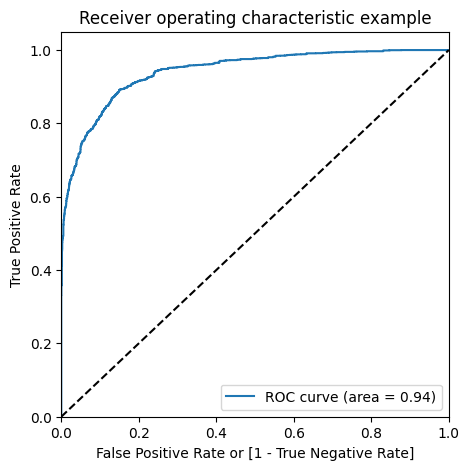

In [146]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [147]:
## finding the ideal cutoff point

# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.136223,0,1,1,0,0,0,0,0,0,0,0
1,1,0.640753,1,1,1,1,1,1,1,1,0,0,0
2,0,0.638362,1,1,1,1,1,1,1,1,0,0,0
3,0,0.003451,0,1,0,0,0,0,0,0,0,0,0
4,0,0.157114,0,1,1,0,0,0,0,0,0,0,0


In [148]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.751603  0.975427  0.527778
0.2   0.2  0.814815  0.957977  0.671652
0.3   0.3  0.847578  0.943732  0.751425
0.4   0.4  0.862179  0.908476  0.815883
0.5   0.5  0.868768  0.870370  0.867165
0.6   0.6  0.858440  0.814103  0.902778
0.7   0.7  0.847578  0.754274  0.940883
0.8   0.8  0.814993  0.656339  0.973647
0.9   0.9  0.777066  0.563034  0.991097


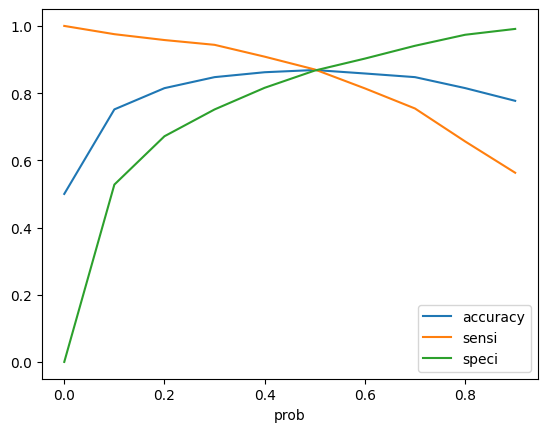

In [149]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### As per the plot 0.5 is the ideal cutoff point

Previously, we took 0.5 cutoffs as arbitary point , but actually the cutoff is 0.5, so not calculating the confusion matrix again




In [150]:
# Making predictions on the test set

X_test[['CashbackAmount','OrderAmountHikeFromlastYear','WarehouseToHome']] = scaler.transform(X_test[['CashbackAmount','OrderAmountHikeFromlastYear','WarehouseToHome']])

In [151]:
X_test = X_test[col]
X_test.head()

,CityTier,WarehouseToHome,NumberOfDeviceRegistered,NumberOfAddress,Complain,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,tenure_group_medium-tenured,tenure_group_high-tenured
780,1,-1.167404,4,4,0,1,7,1.590878,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1896,2,-0.795662,1,10,0,3,6,-0.352145,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
5621,3,2.426101,5,6,1,0,1,1.050036,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
2612,3,0.071736,3,2,1,1,7,-0.832893,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1926,1,-1.167404,5,4,0,1,2,-0.872955,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0


In [152]:
len(X_test.columns)

25

In [153]:
X_test_sm = sm.add_constant(X_test)

In [154]:
# Prediction

y_test_pred = res.predict(X_test_sm)

In [155]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [156]:
# Let's see the head
y_pred_1.head()

,0
780,0.046923
1896,0.004118
5621,0.721449
2612,0.202838
1926,0.248882


In [157]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [158]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [159]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [160]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [161]:
y_pred_final.head()

,Churn,Churn_Prob,final_predicted
780,0,0.046923,0
1896,0,0.004118,0
5621,1,0.721449,1
2612,0,0.202838,0
1926,0,0.248882,0


In [162]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.8354059985369422

In [163]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1035,  170],
       [  55,  107]])

In [164]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [165]:
# Sensitivity
TP / float(TP+FN)

0.6604938271604939

In [166]:
# Specificity
TN / float(TN+FP)

0.8589211618257261

In [170]:
# Precision

precision = confusion2[1,1]/(confusion2[1,1] + confusion2[0,1])

In [168]:
# Recall

recall = confusion2[1,1]/(confusion2[1,1] + confusion2[1,0])

In [169]:
F1 = (2* precision * recall )/(precision + recall)
print(F1)

0.4874715261958998
